# Bright SNe lightcurves

This is based on the Lasair example at https://github.com/lsst-uk/lasair-examples/blob/main/notebooks/API_lsst/BrightSNe.ipynb

In [1]:
import getpass
from lasair import lasair_client as lasair

from panoptes_client import SubjectSet, Panoptes

from src.lsst_zooniverse.generator import LSSTSubjectGenerator

from IPython.display import Image, display


In [ ]:
zooniverse_username = input('Zooniverse username')
zooniverse_password = getpass.getpass('Zooniverse password')
API_TOKEN = getpass.getpass('Lasair API token')

In [3]:
Panoptes.connect(username=zooniverse_username, password=zooniverse_password)

In [4]:
PROJECT_ID = 7
SUBJECT_SET_ID = 132831

In [5]:
endpoint = "https://lasair-lsst-dev.lsst.ac.uk/api"

In [6]:
L = lasair(API_TOKEN, endpoint=endpoint)

In [7]:
ra = 51.358273
dec= -27.692442
radii = [100.0, 10, 0]
for radius in radii:
    result = L.cone(ra, dec, radius, requestType='count')
    print('Found %d at radius %f' % (result['count'], radius))

Found 34 at radius 100.000000
Found 0 at radius 10.000000
Found 0 at radius 0.000000


In [8]:
# Just join the objects table and the sherlock_classifications table, just
# pulling out the objectId.
rows = L.query(
    "objects.diaObjectId AS objectId",
    'objects, sherlock_classifications',
    """ sherlock_classifications.classification = "SN"
        AND objects.g_psfFlux > 2000 AND objects.r_psfFlux > 2000
        AND objects.nSourcesGood > 1 
    """,
    limit=10)
objectIds = [row['objectId'] for row in rows]
print(objectIds)

[313629129740648459, 313637935719645190, 313637935723315254, 313673106899599382, 313673106903269400, 313673106931056643, 313673106937872390, 313673106952552462, 313673107196870686, 313673107204210707]


In [9]:
bandColors = {'u': '#9900cc', 'g': '#3366ff', 'r':'#33cc33', 'i':'#ffcc00', 'z':'#ff0000', 'y':'#cc6600'}
glyphs = tuple(('circle', c) for c in bandColors.values())

'Subject 1'

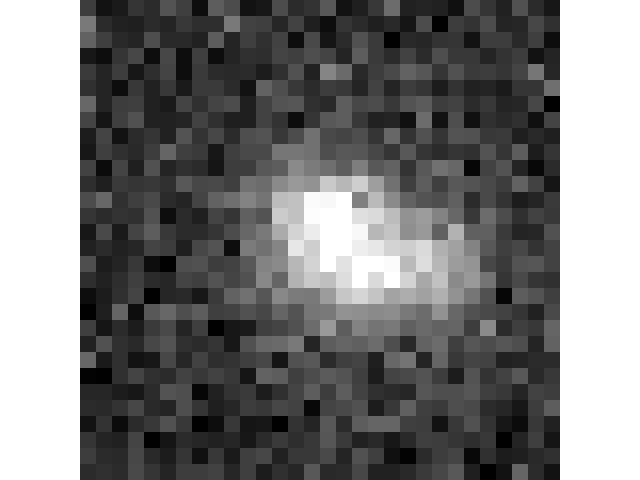

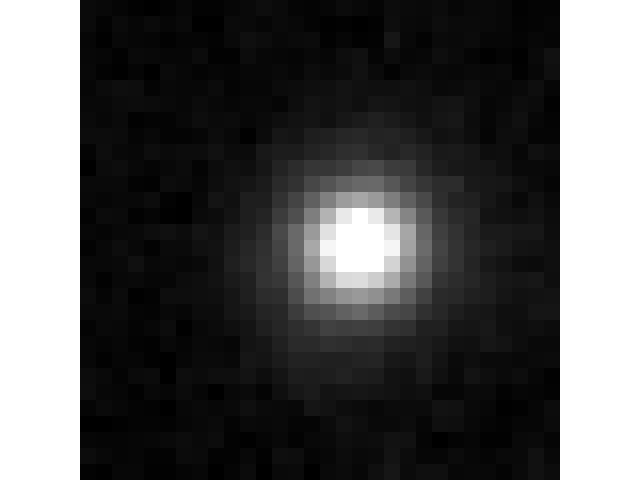

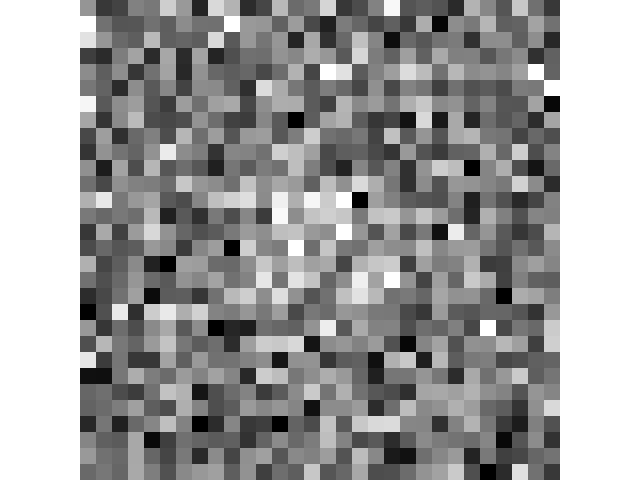

'Subject 2'

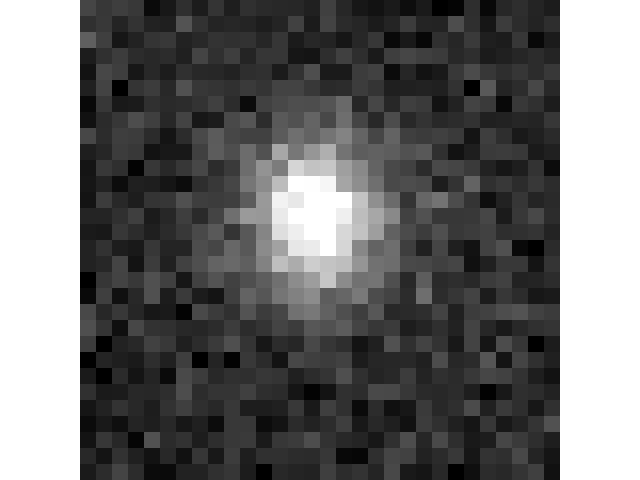

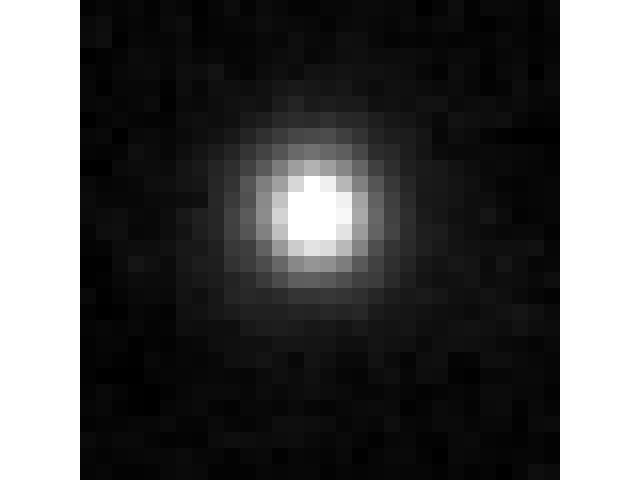

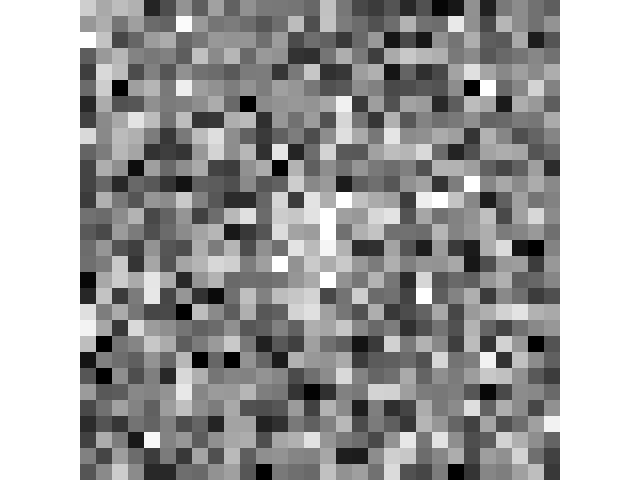

'Subject 3'

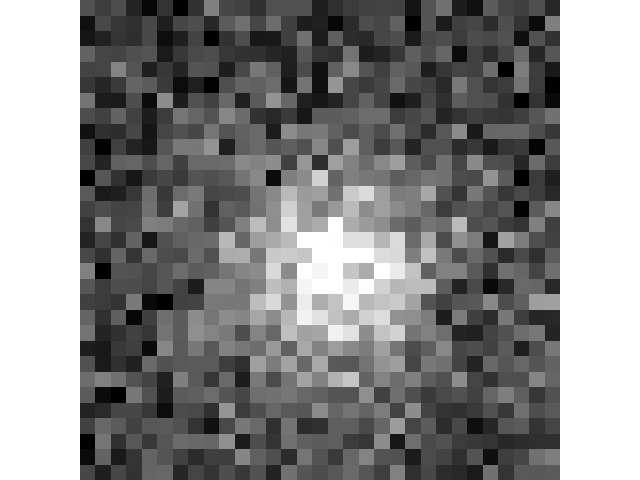

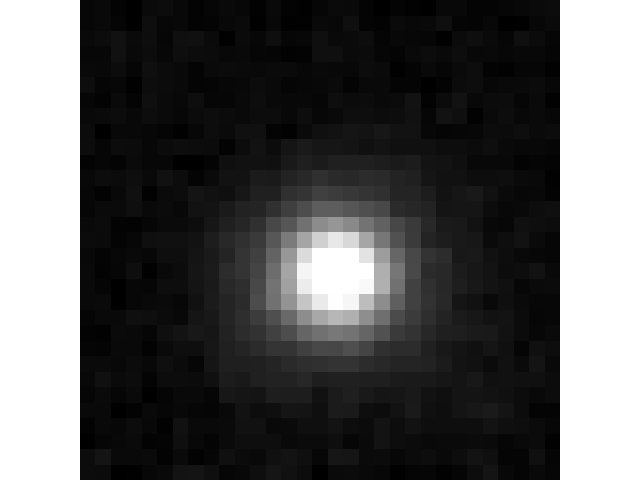

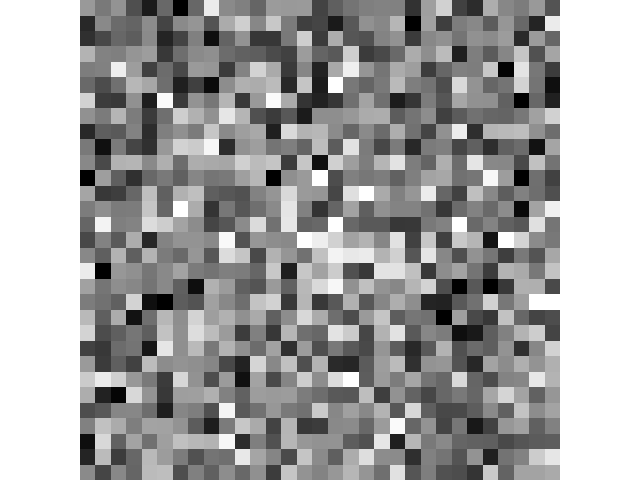

'Subject 4'

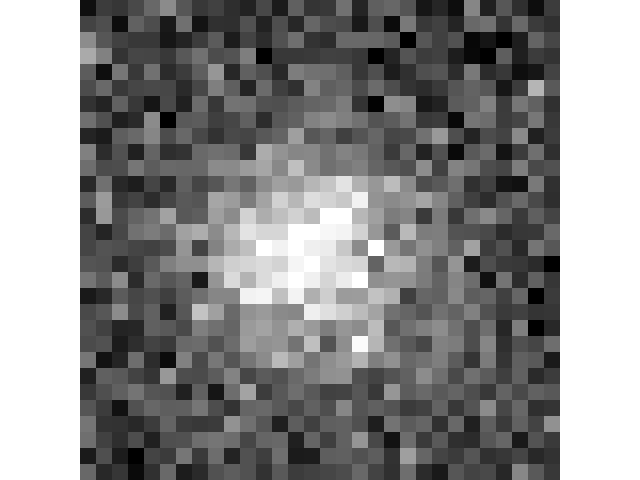

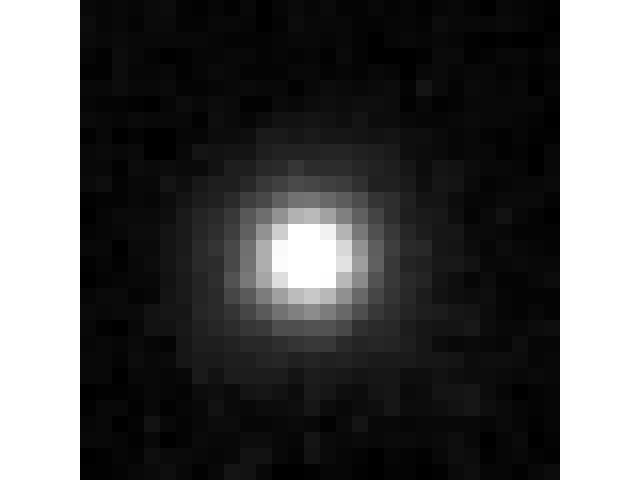

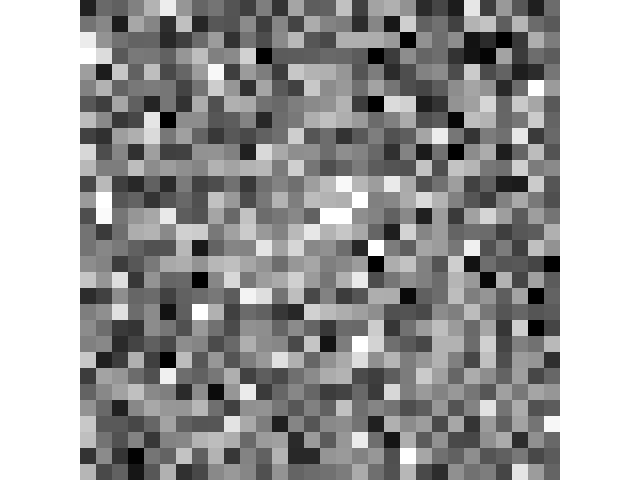

'Subject 5'

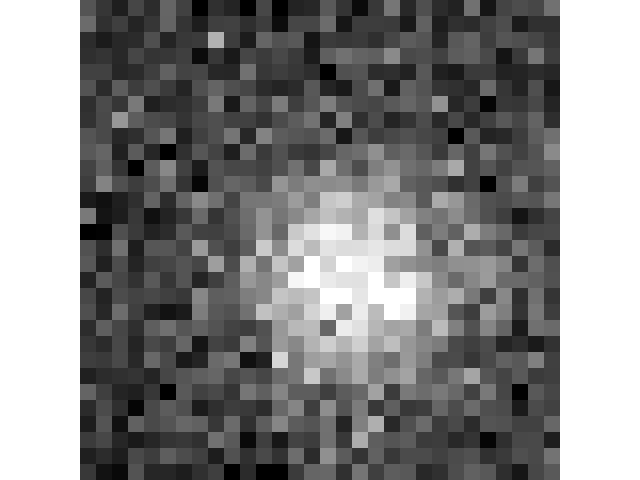

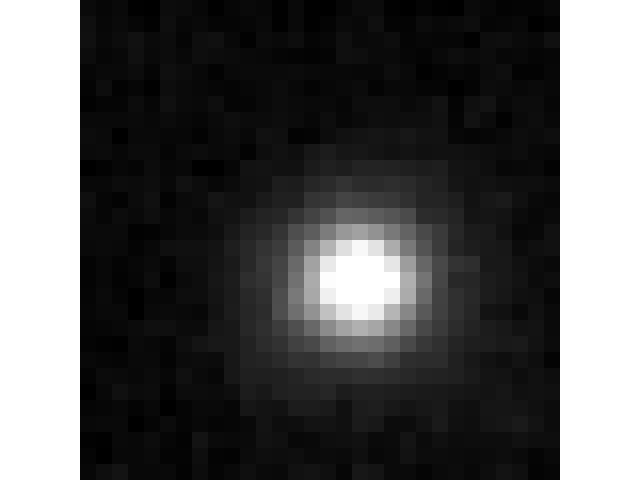

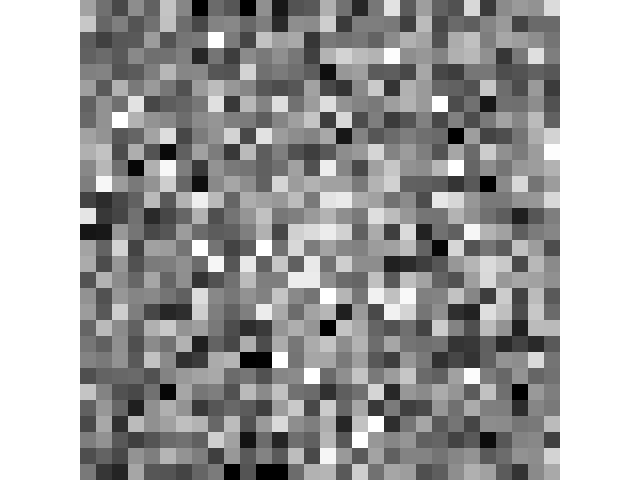

'Subject 6'

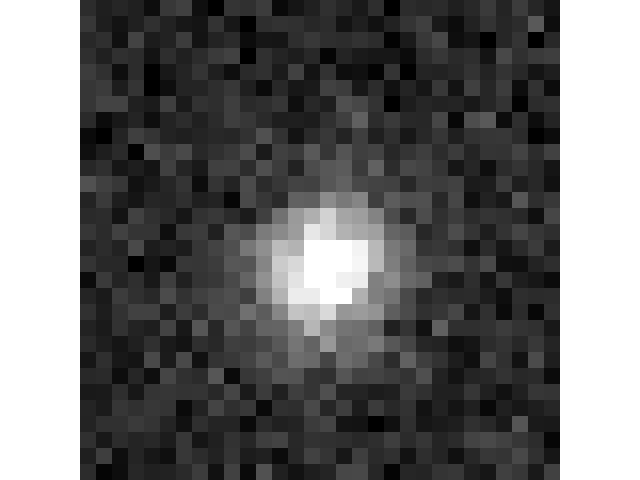

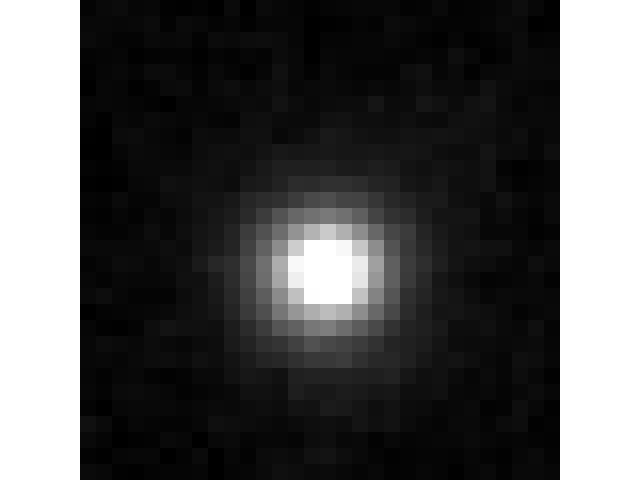

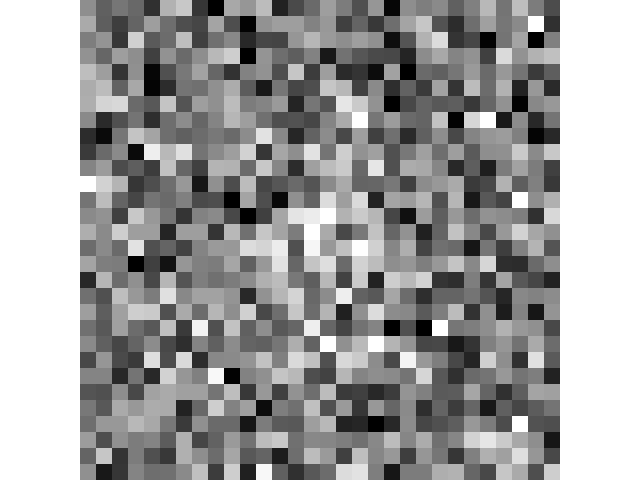

'Subject 7'

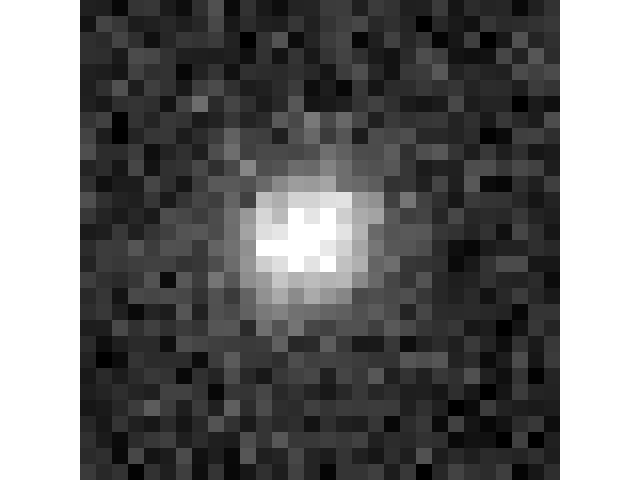

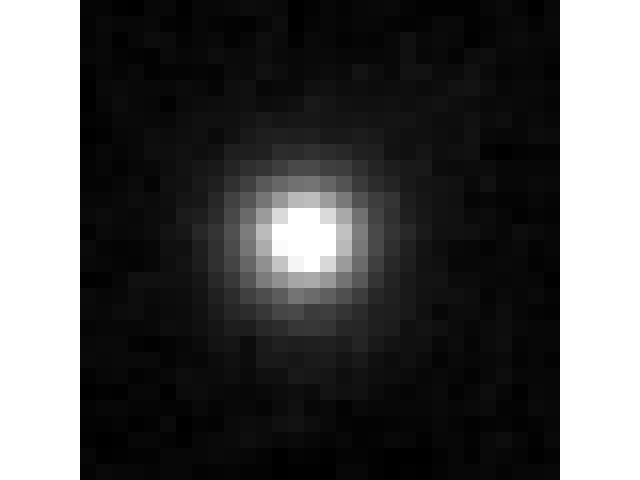

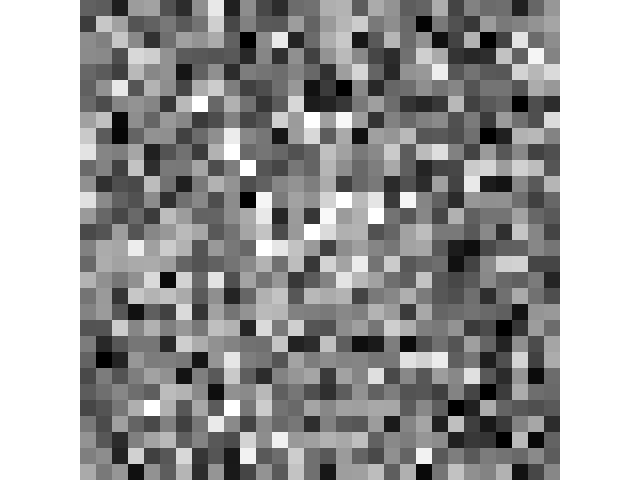

'Subject 8'

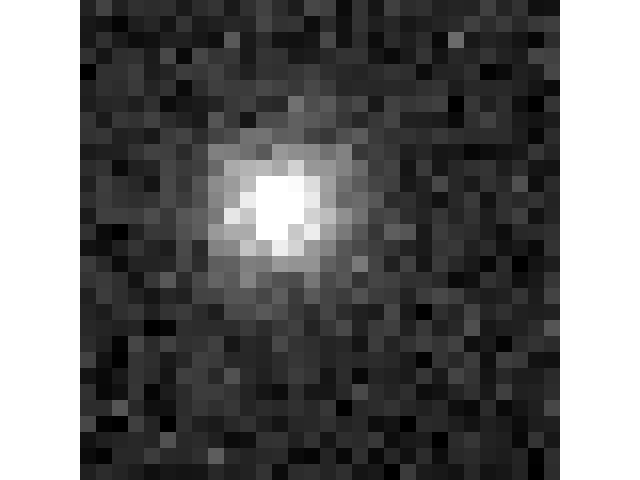

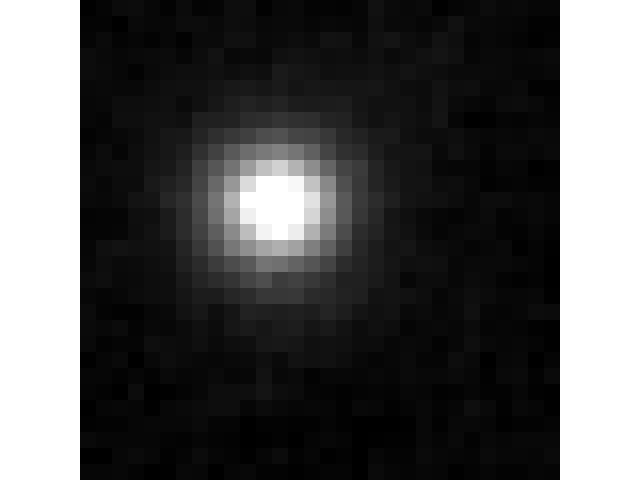

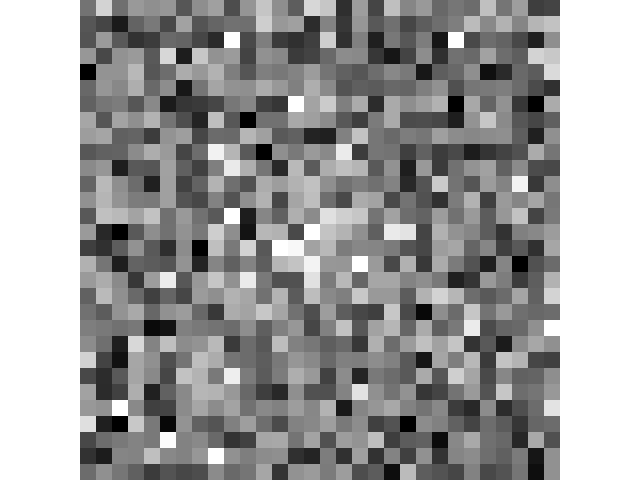

'Subject 9'

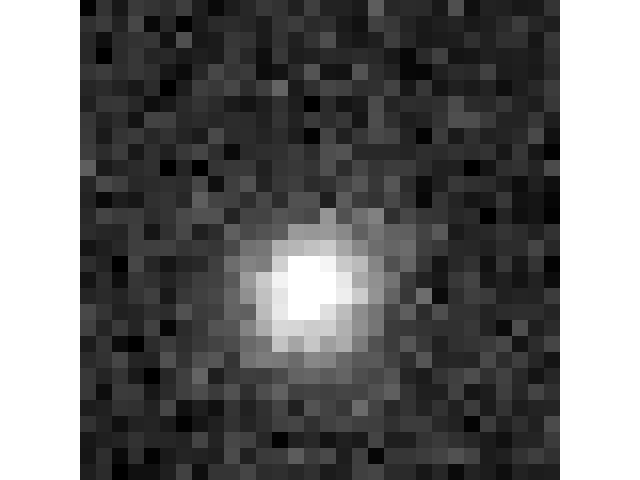

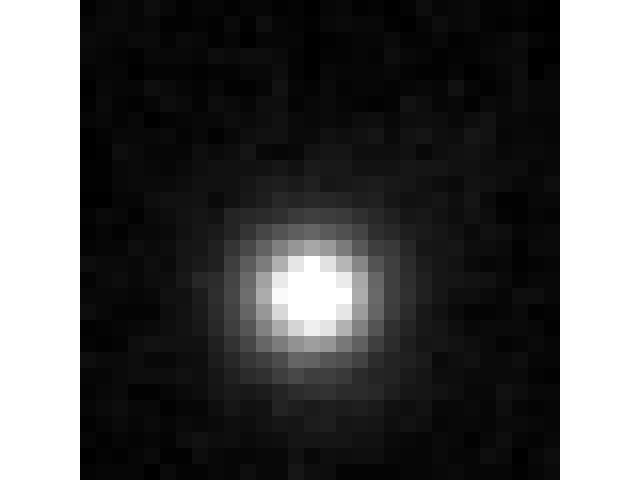

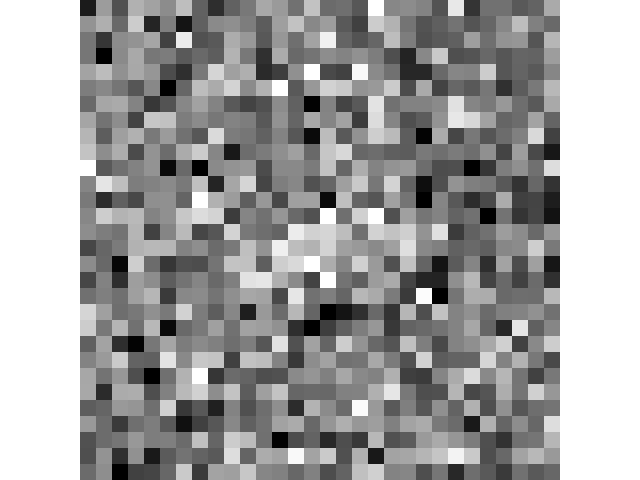

'Subject 10'

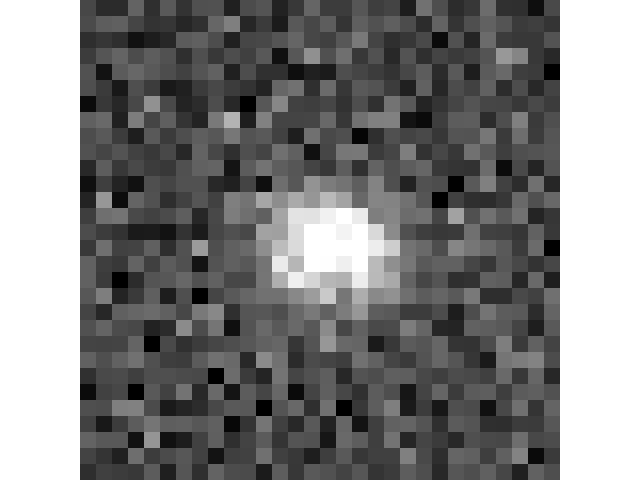

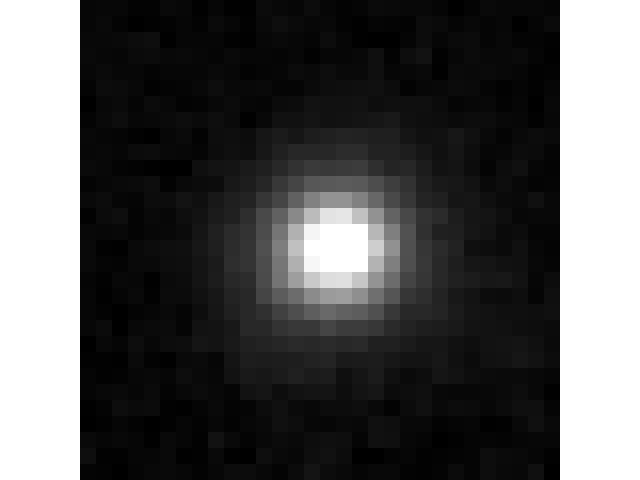

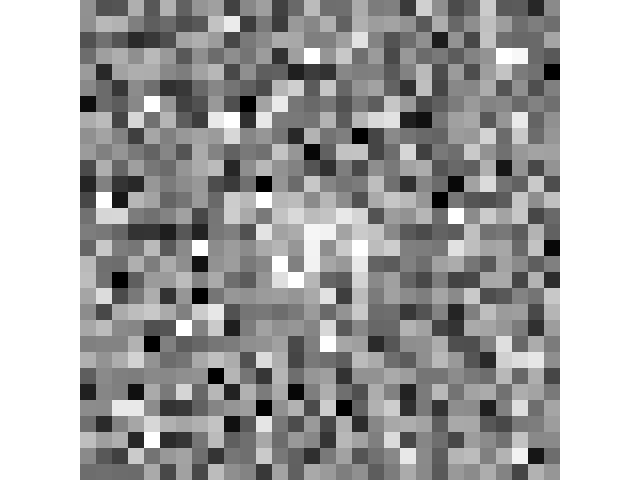

'Subject 11'

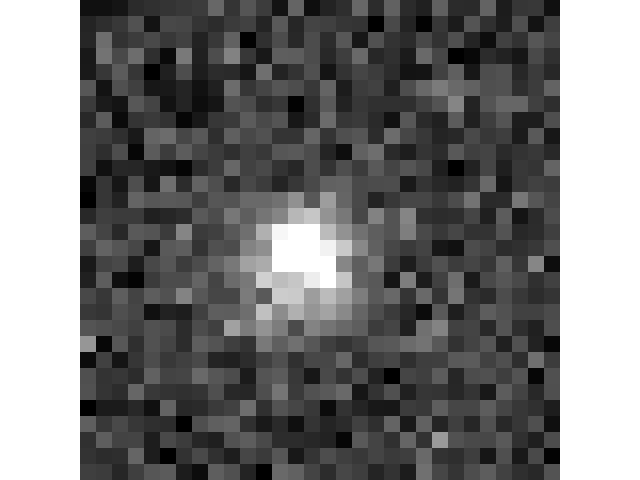

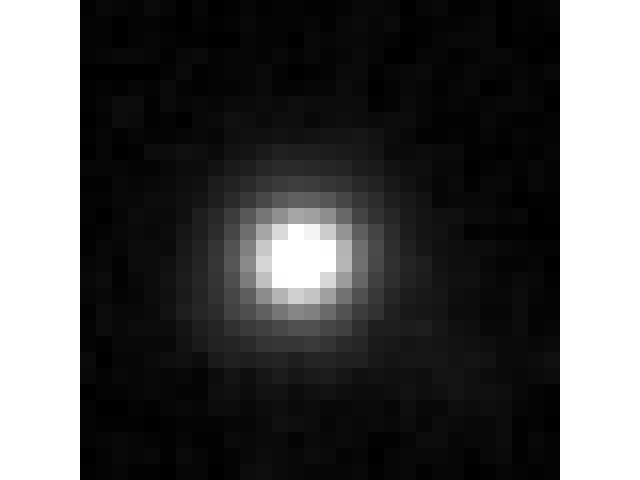

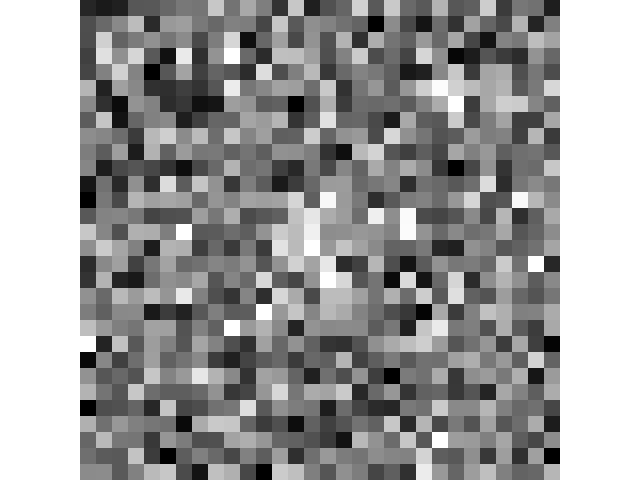

'Subject 12'

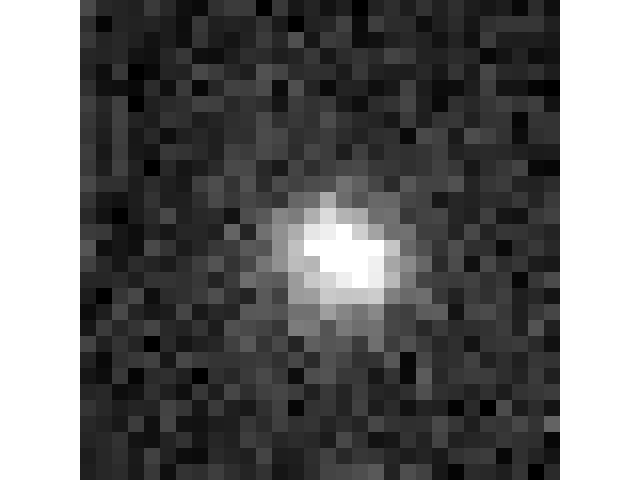

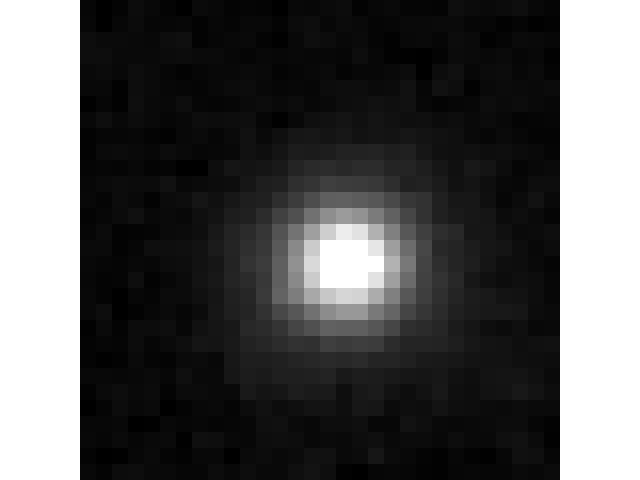

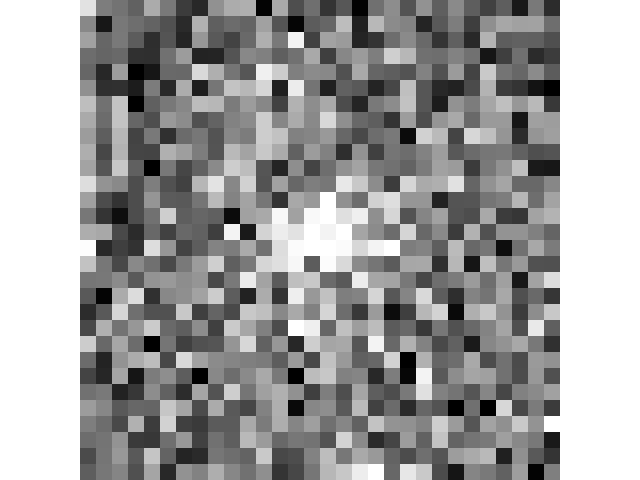

'Subject 13'

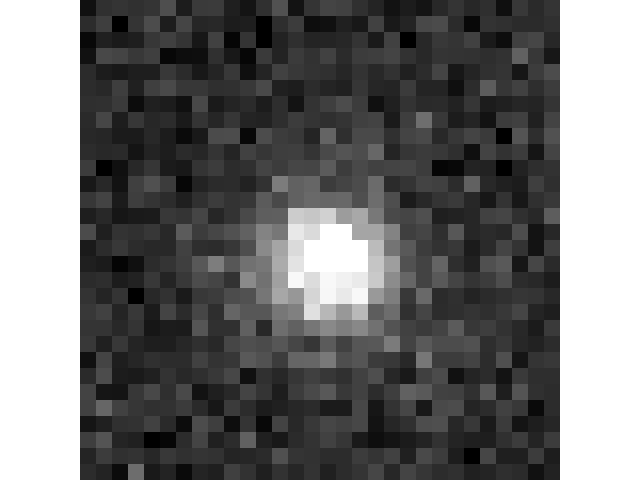

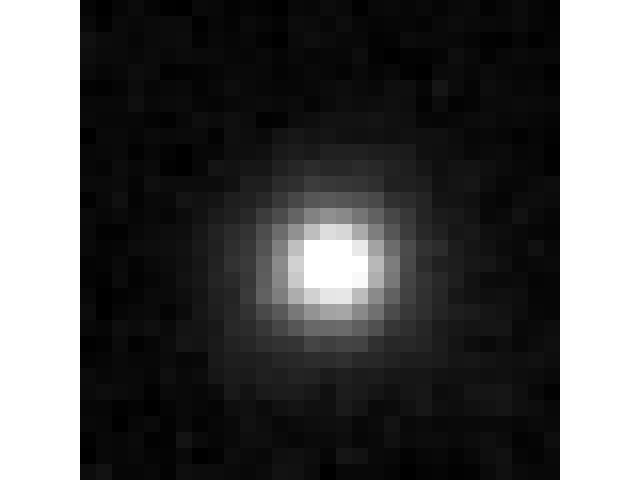

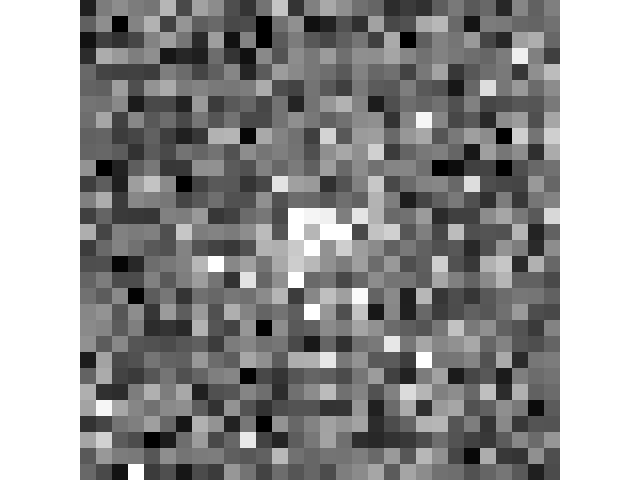

'Subject 14'

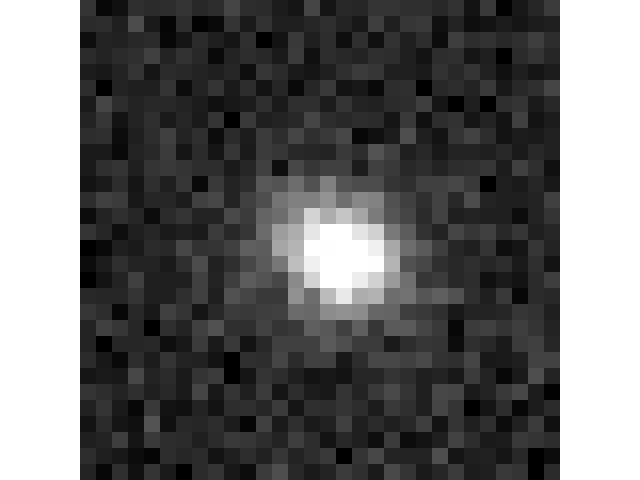

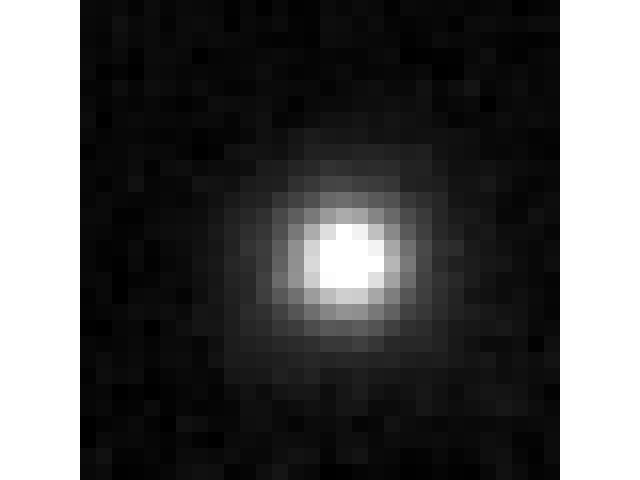

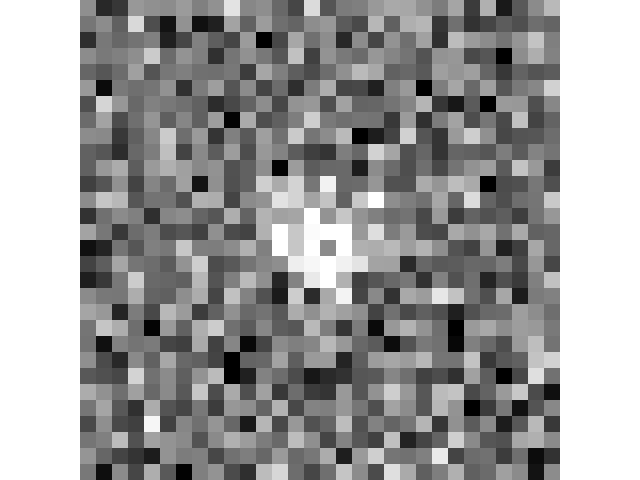

'Subject 15'

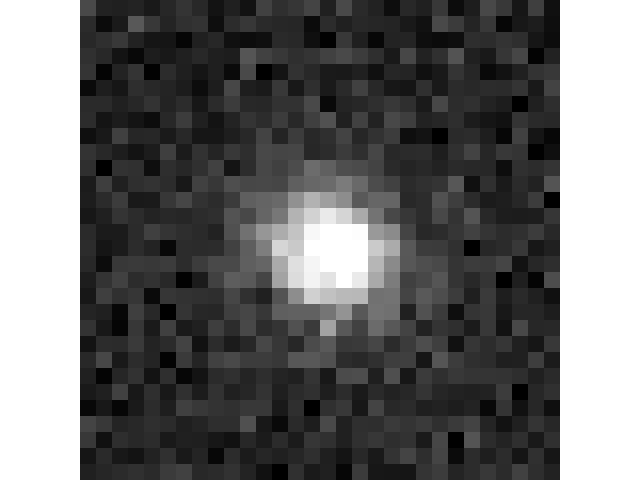

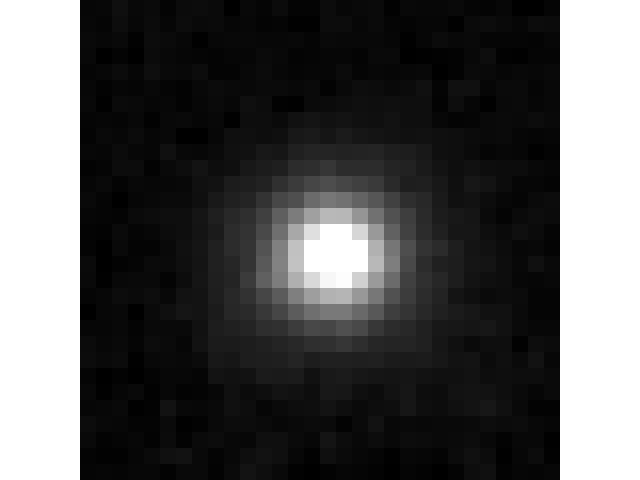

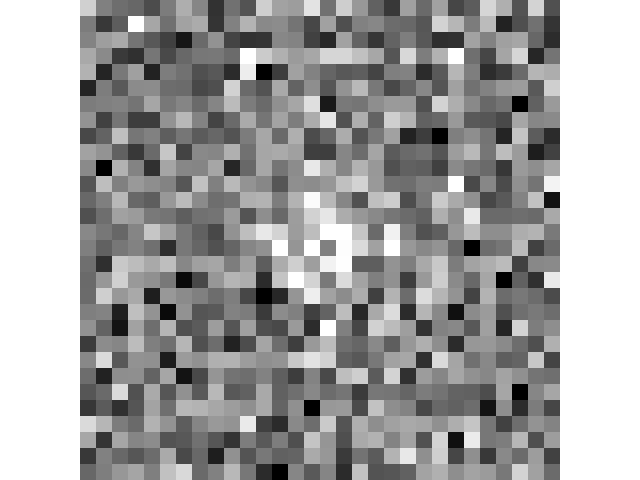

'Subject 16'

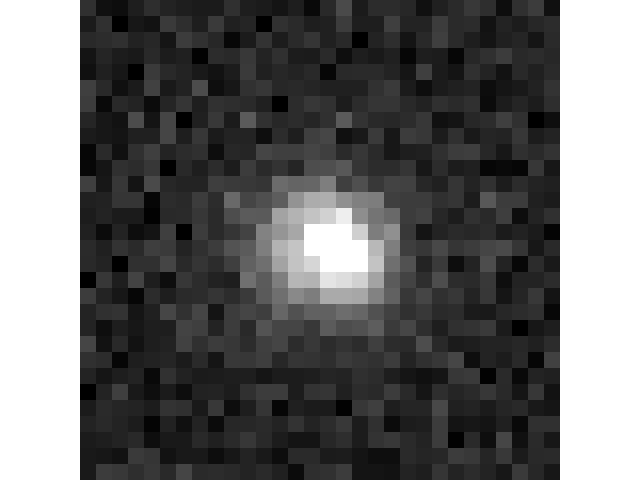

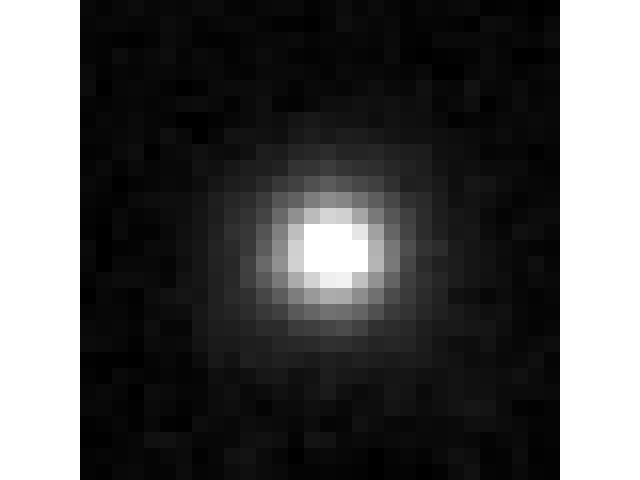

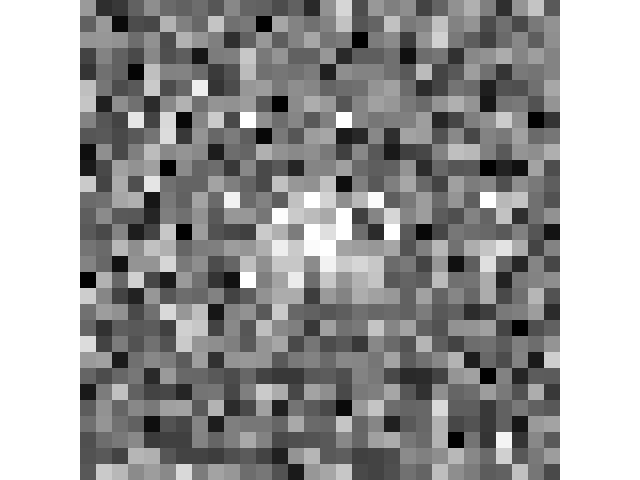

'Subject 17'

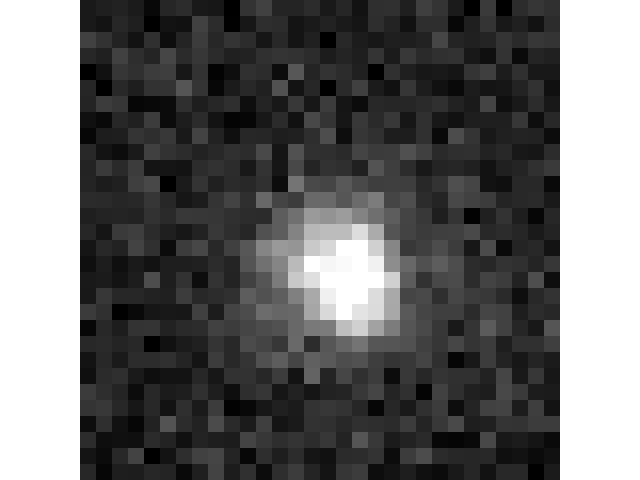

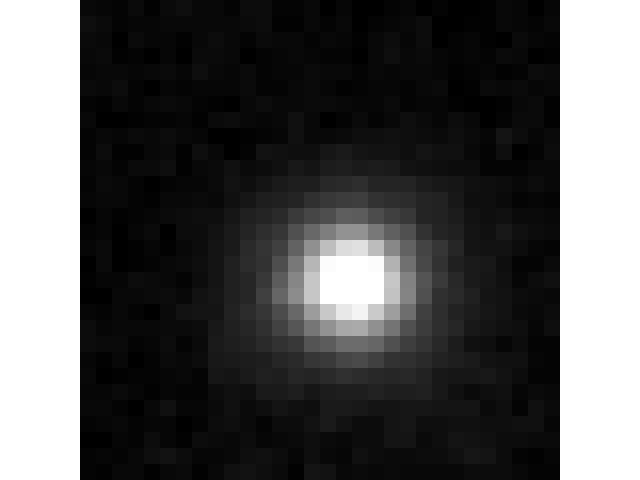

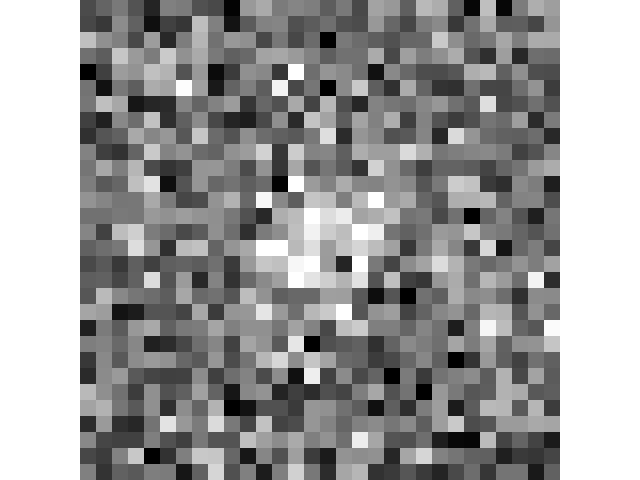

'Subject 18'

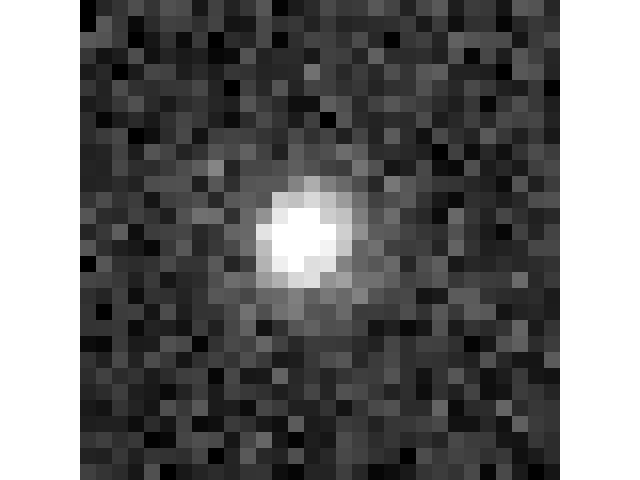

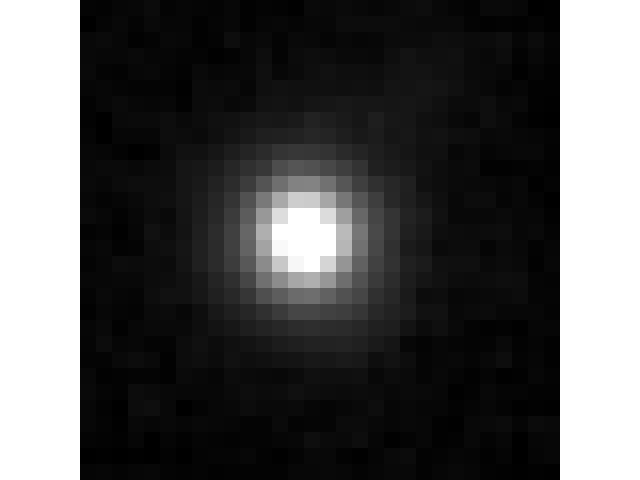

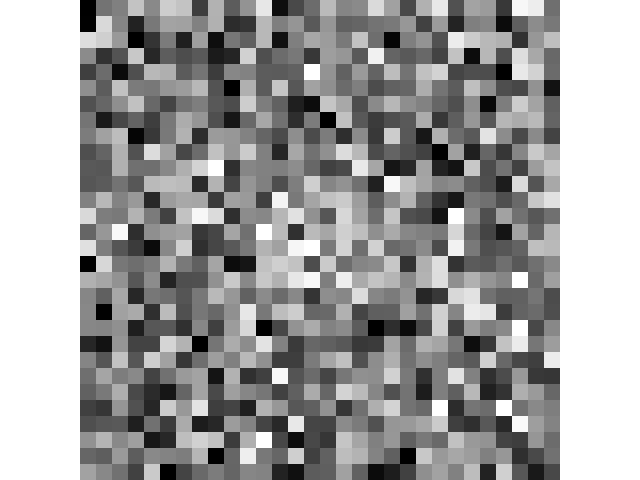

'Subject 19'

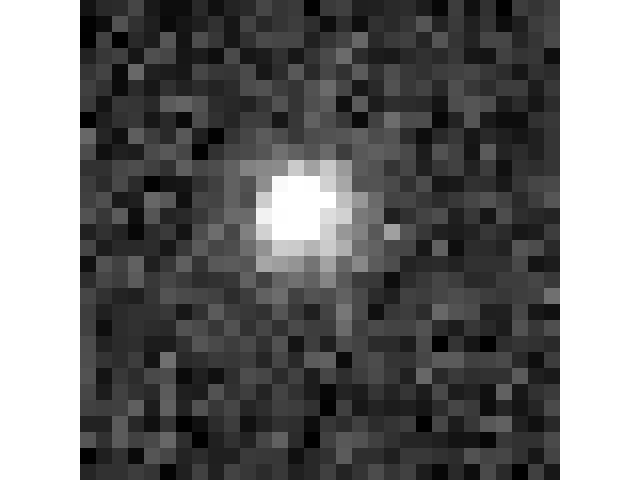

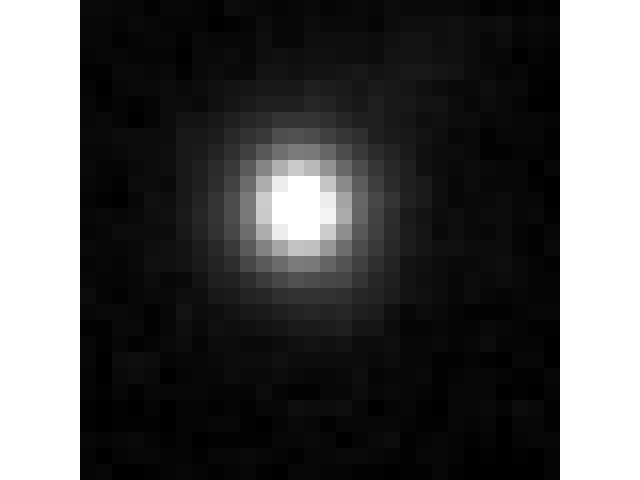

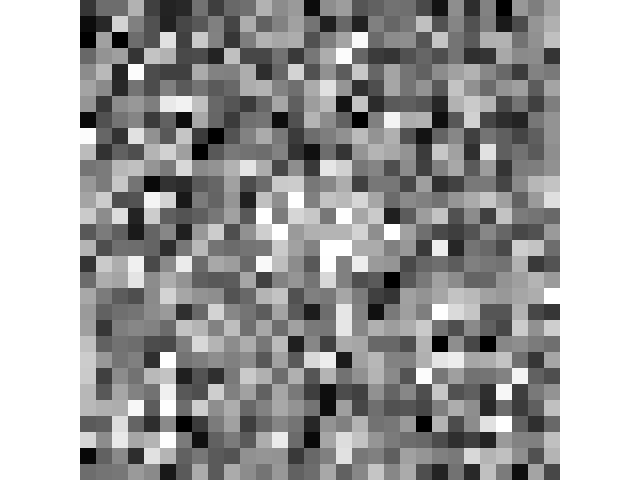

'Subject 20'

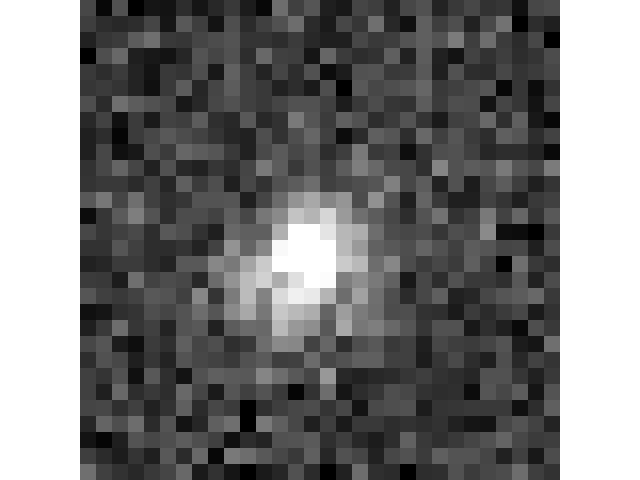

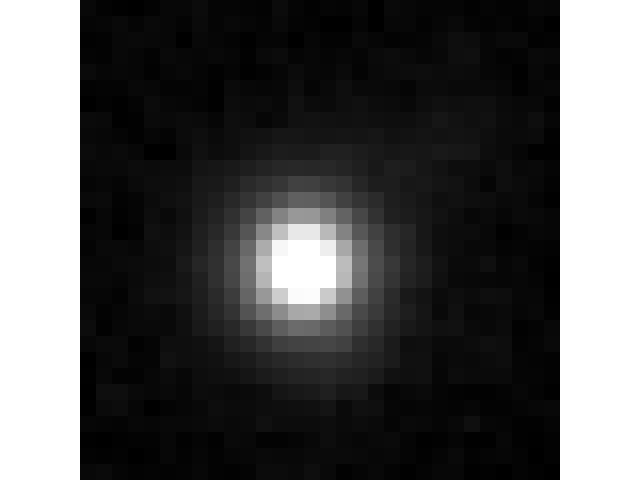

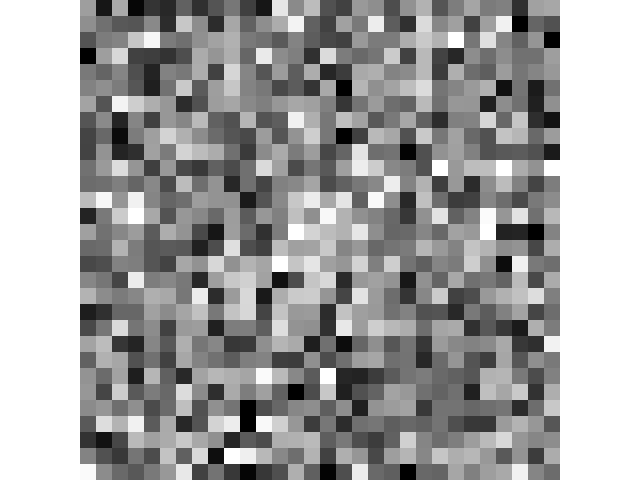

'Subject 21'

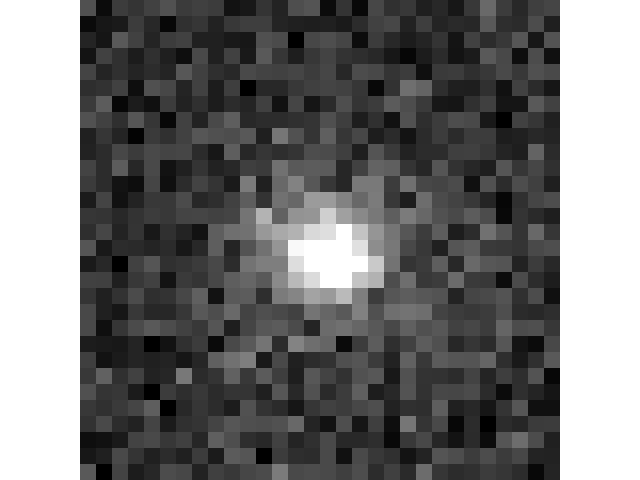

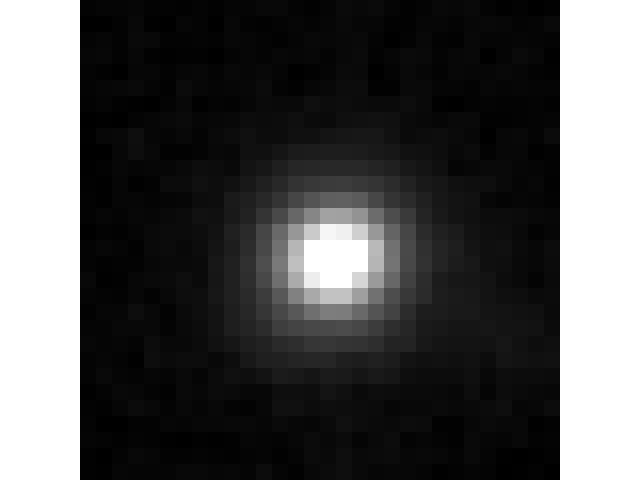

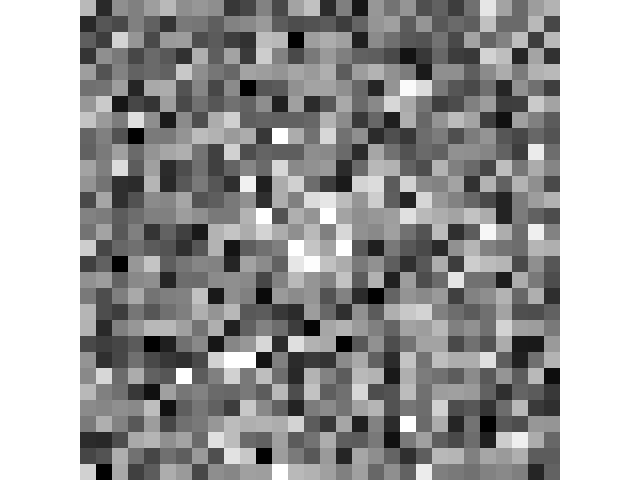

'Subject 22'

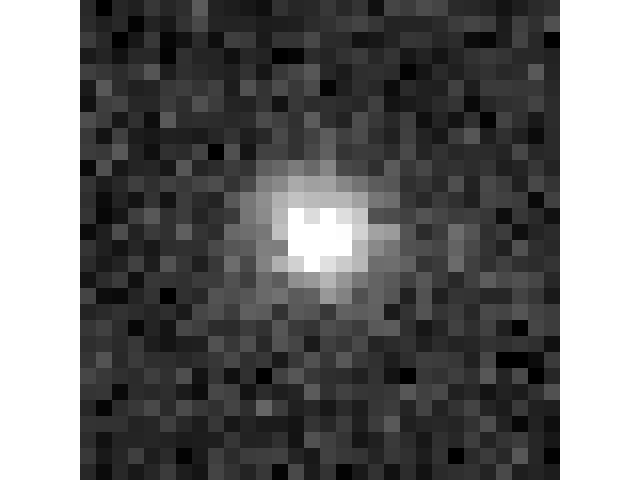

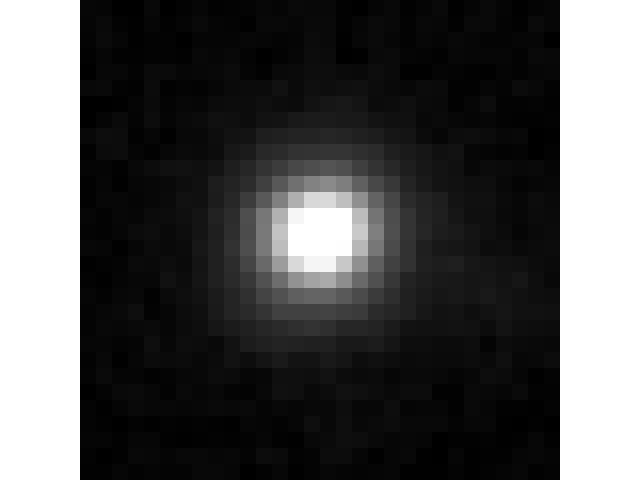

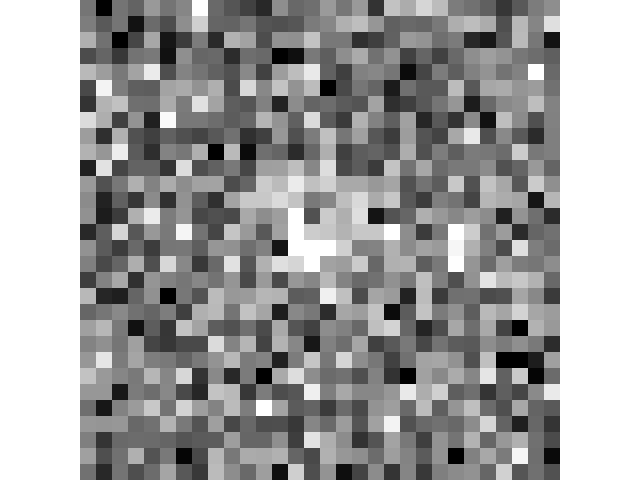

'Subject 23'

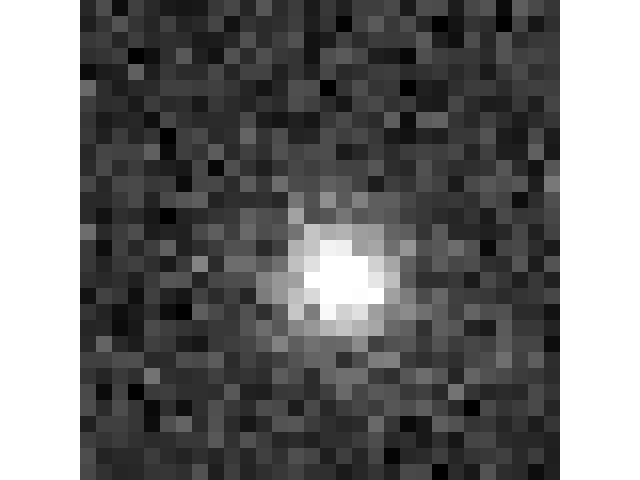

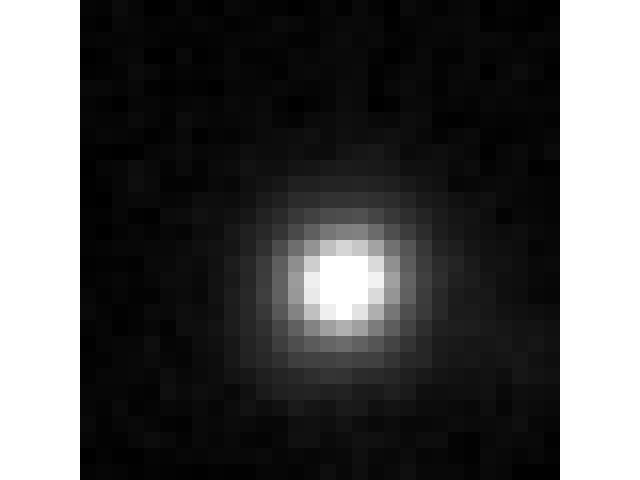

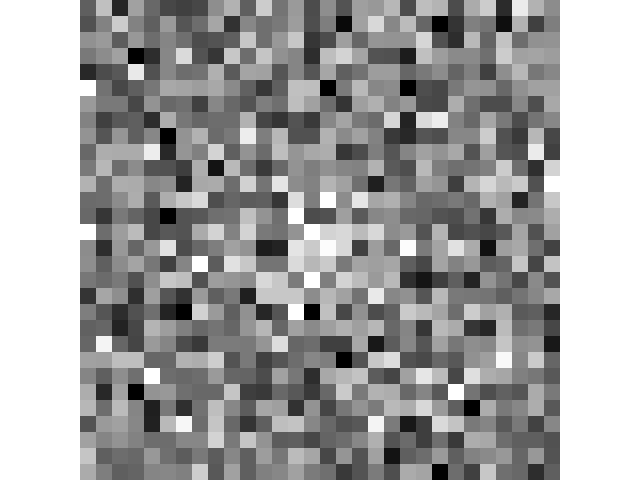

'Subject 24'

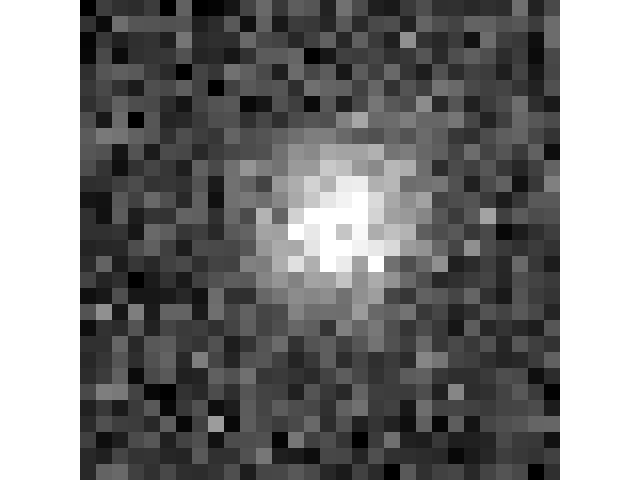

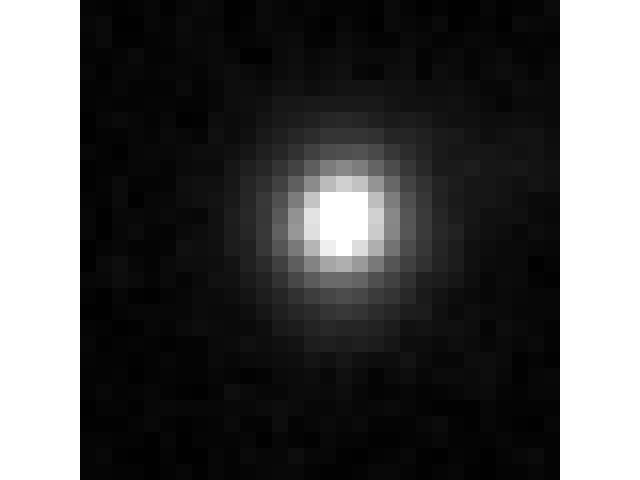

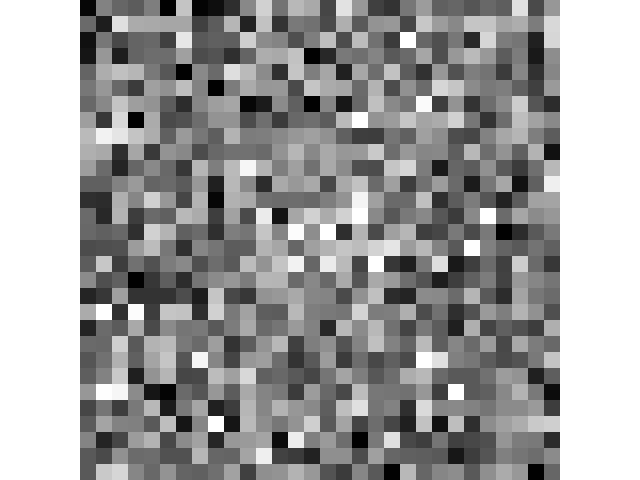

'Subject 25'

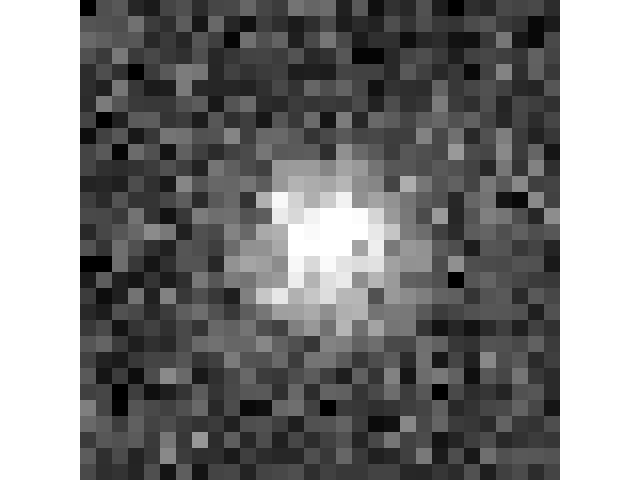

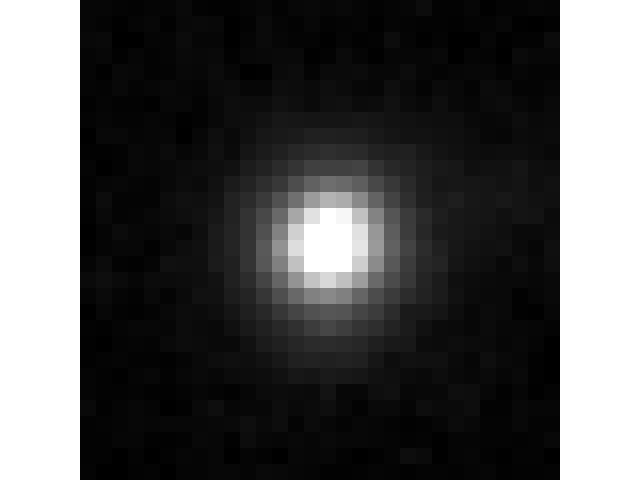

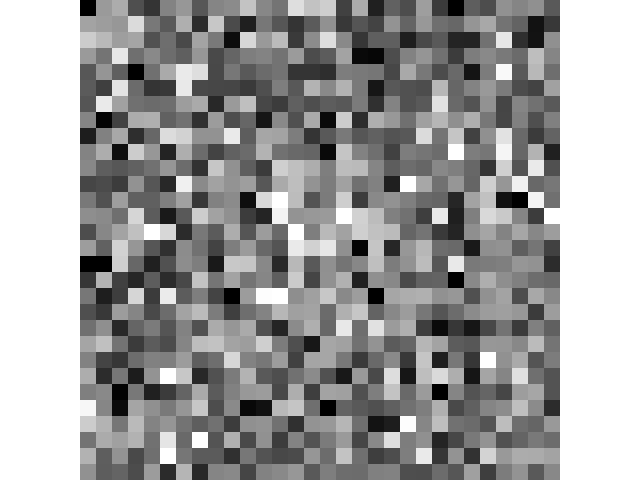

'Subject 26'

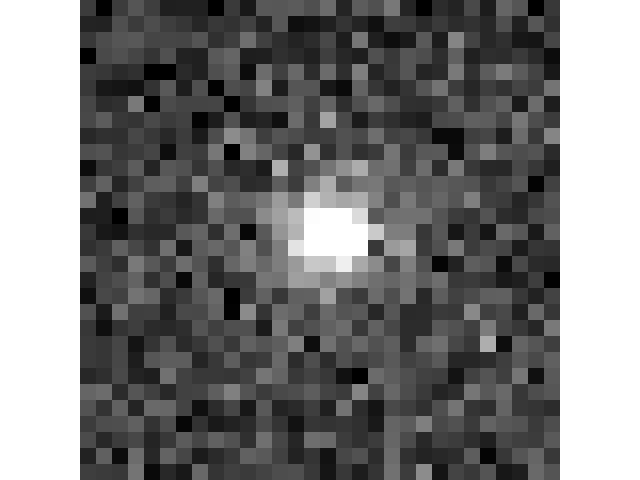

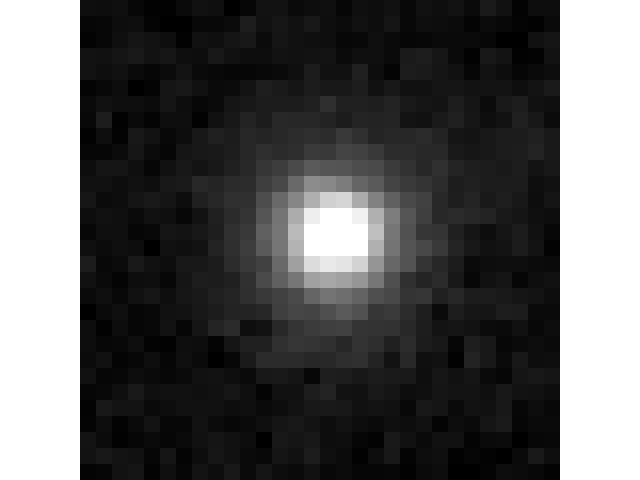

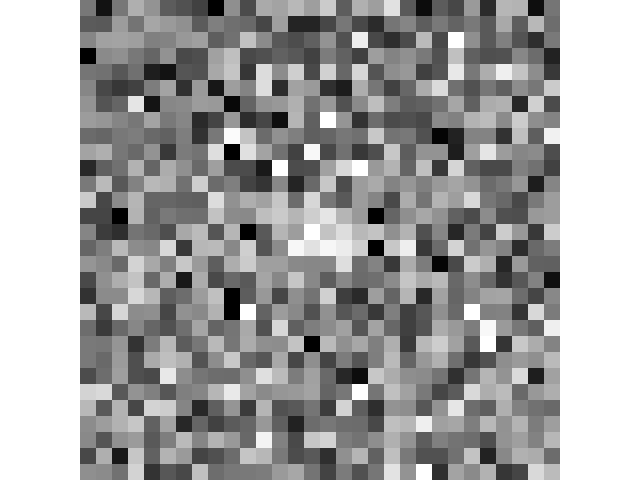

'Subject 27'

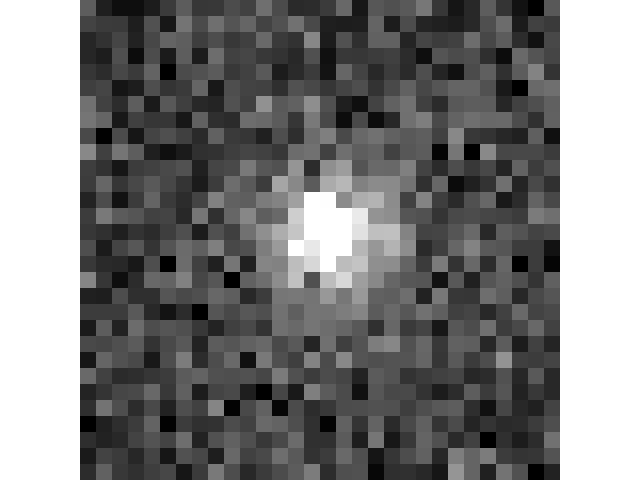

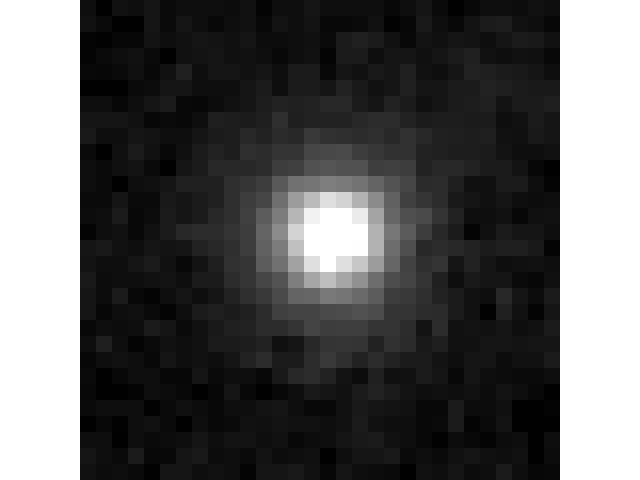

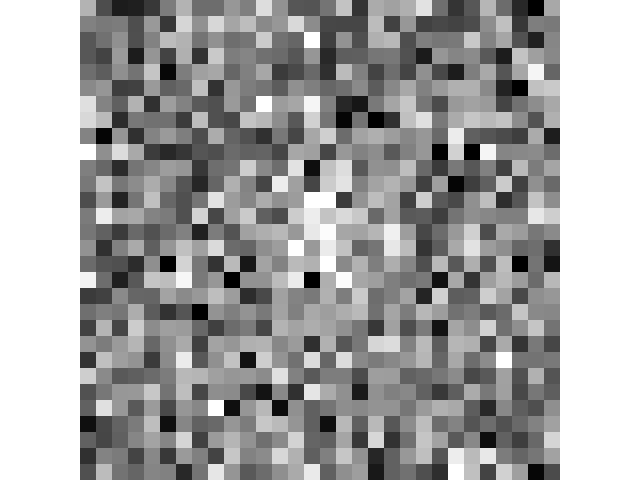

'Subject 28'

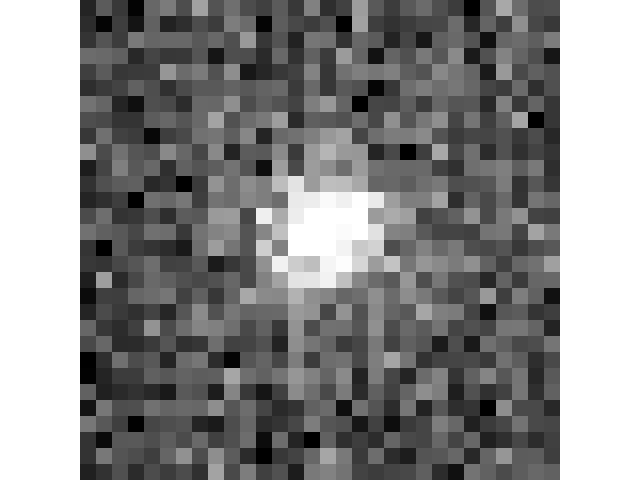

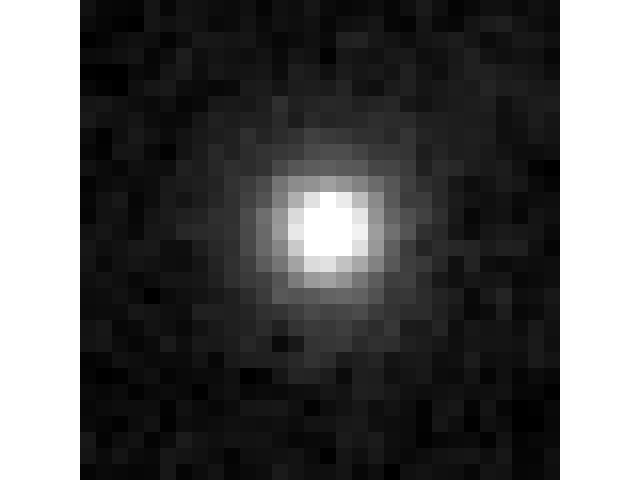

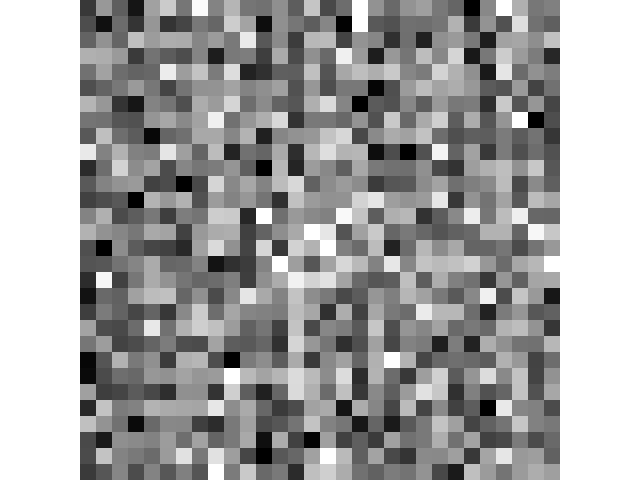

'Subject 29'

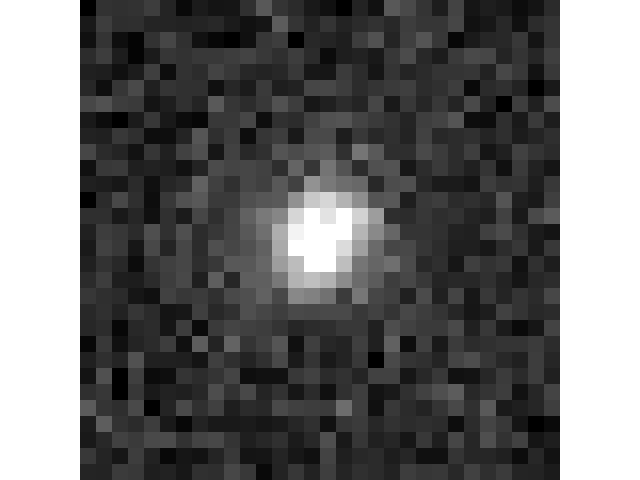

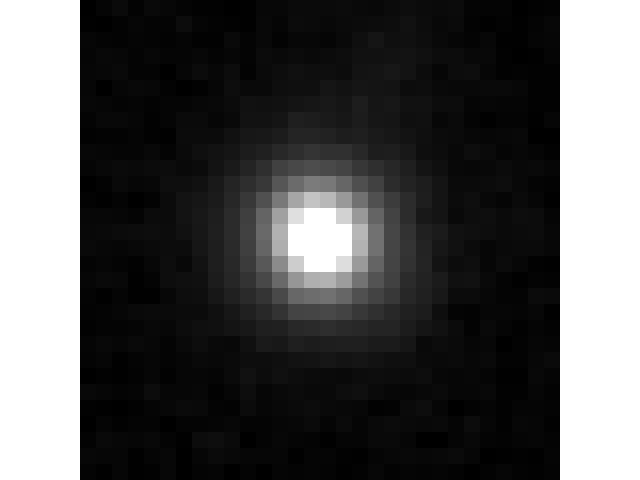

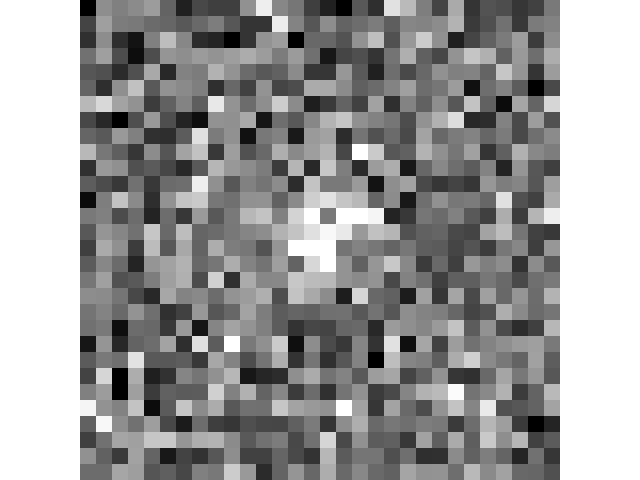

'Subject 30'

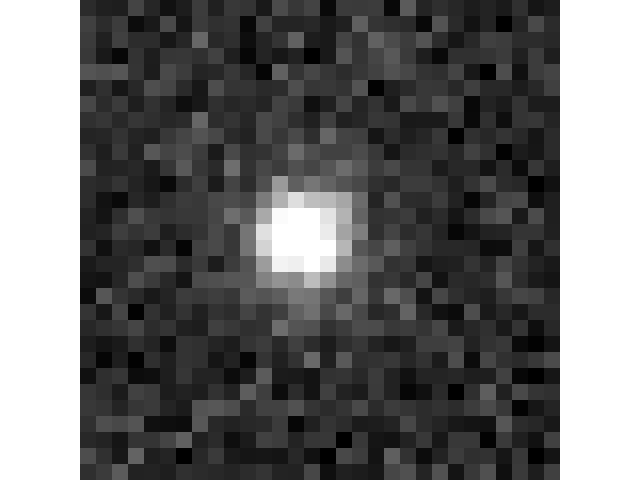

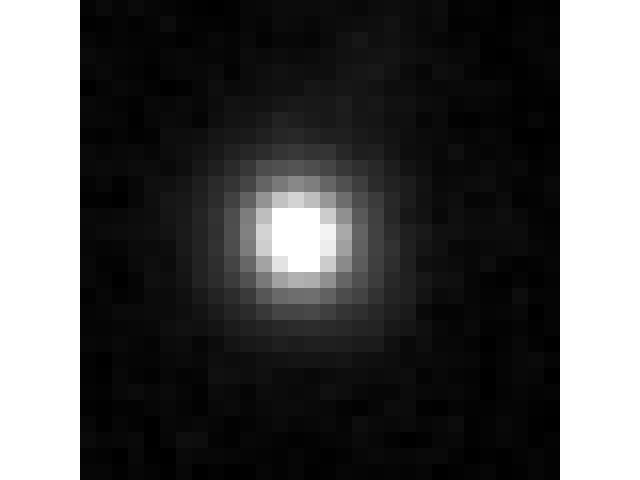

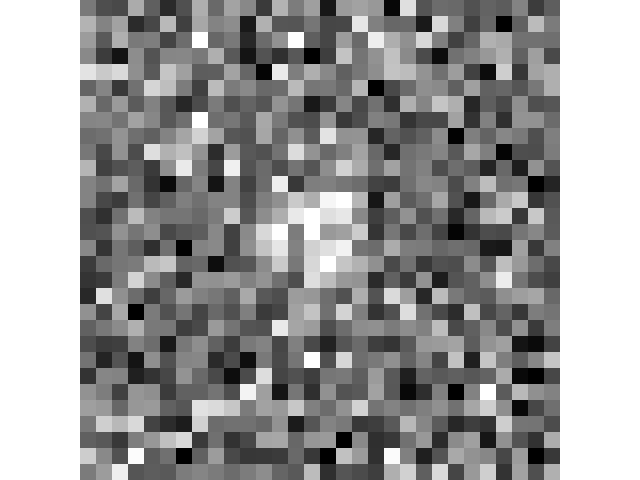

'Subject 31'

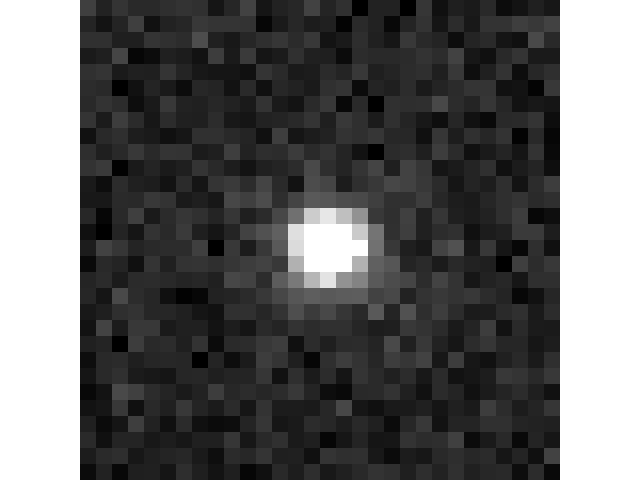

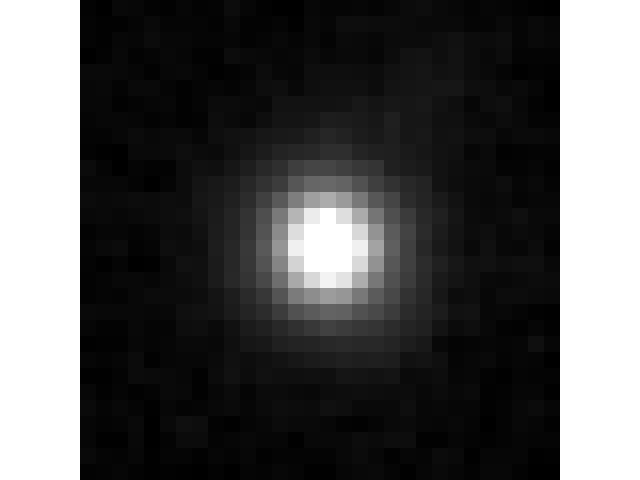

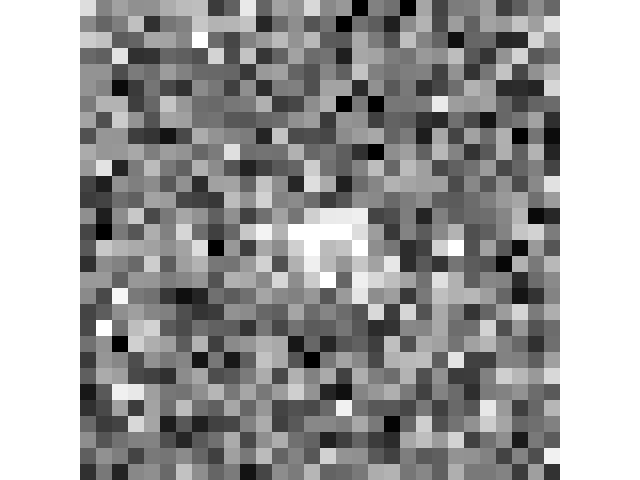

'Subject 32'

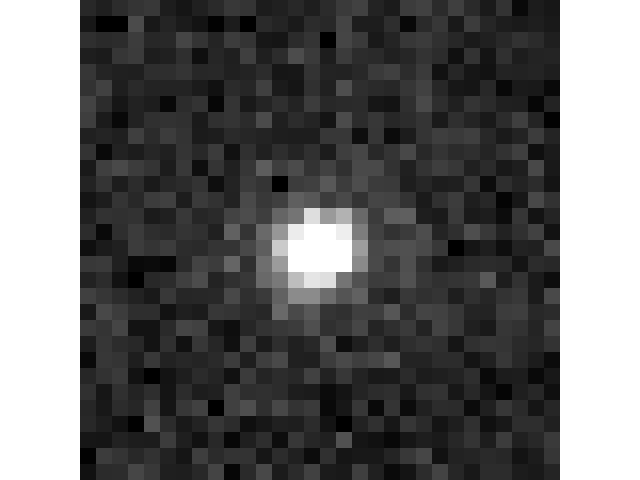

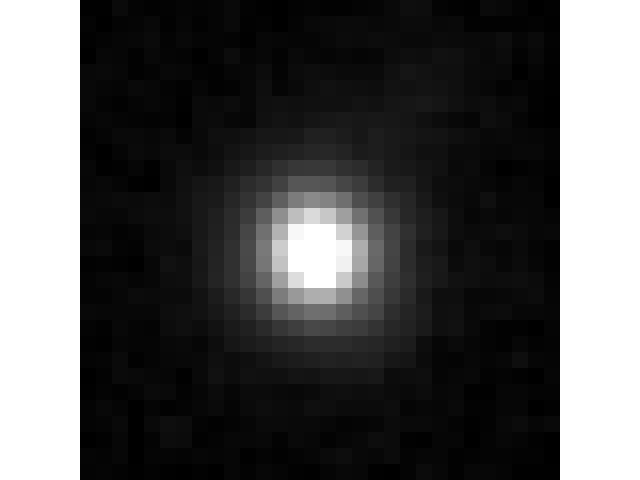

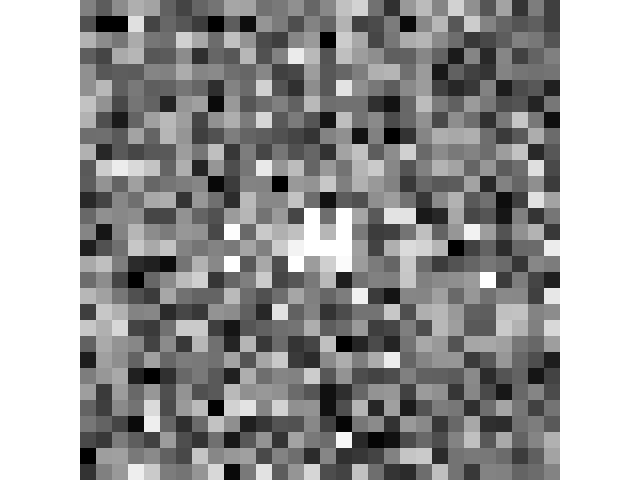

'Subject 33'

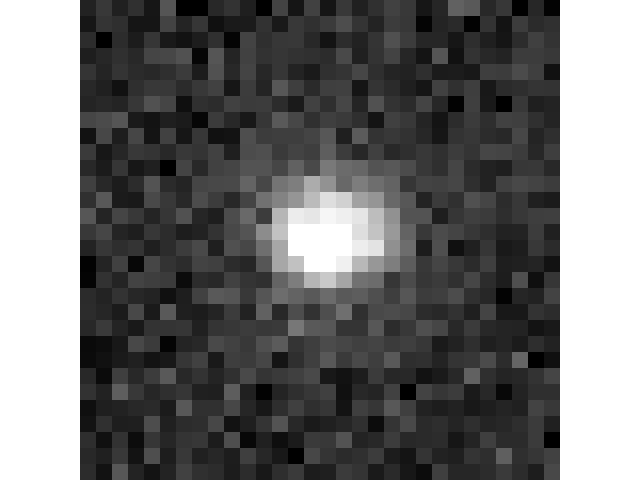

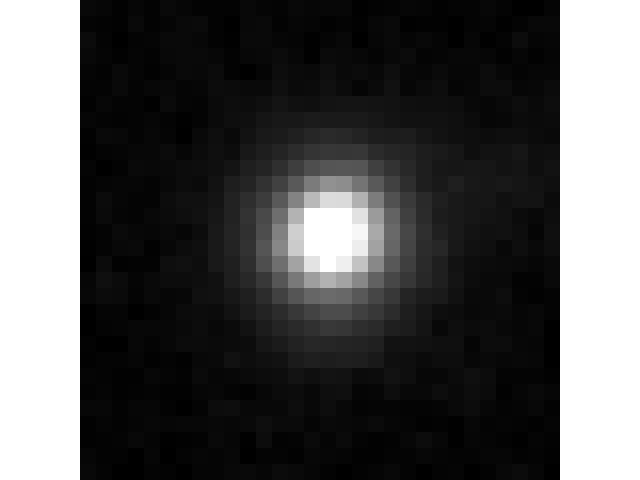

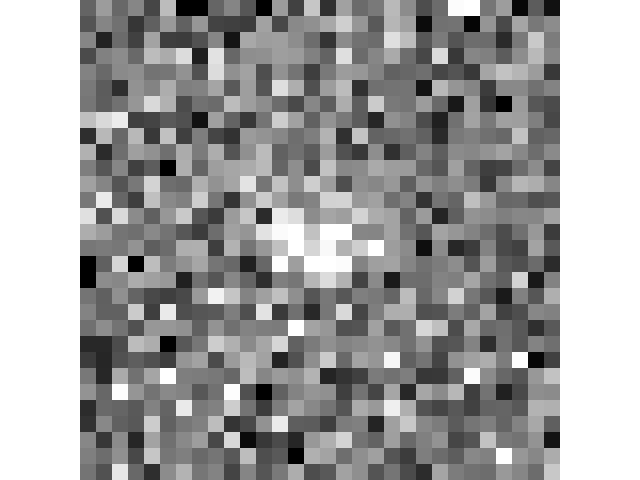

'Subject 34'

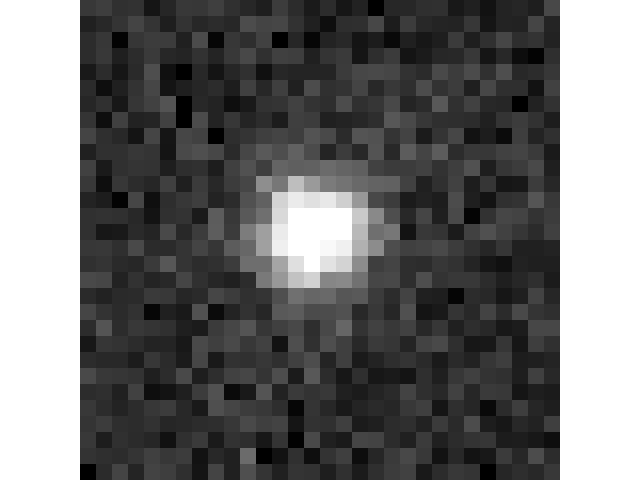

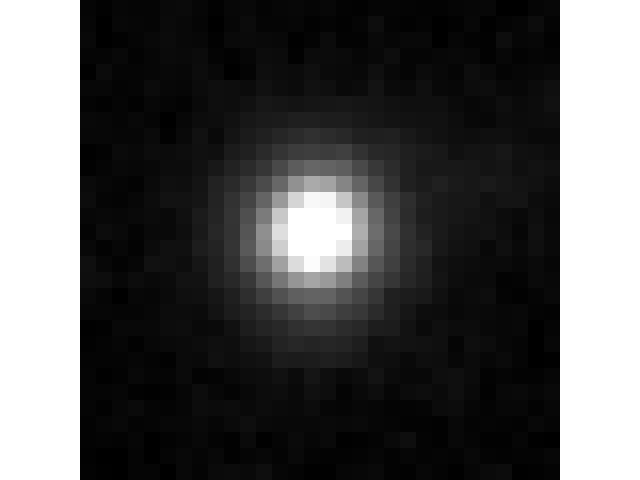

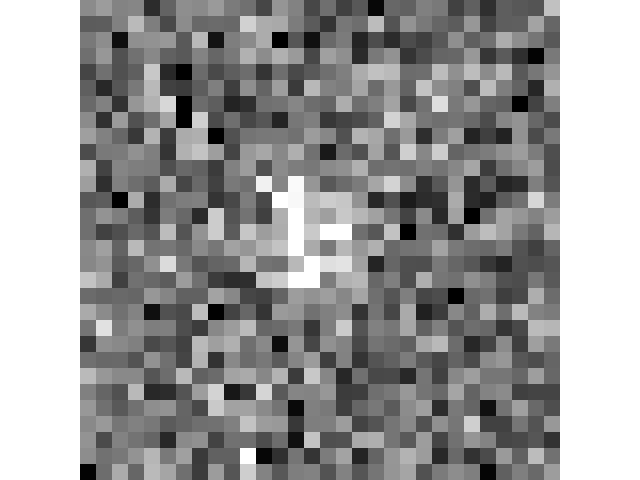

'Subject 35'

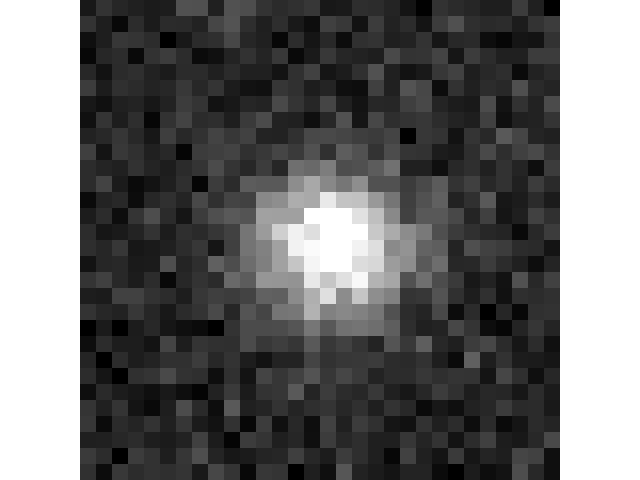

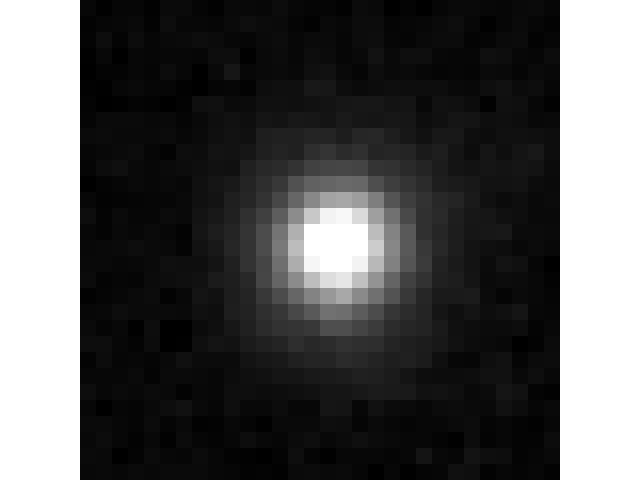

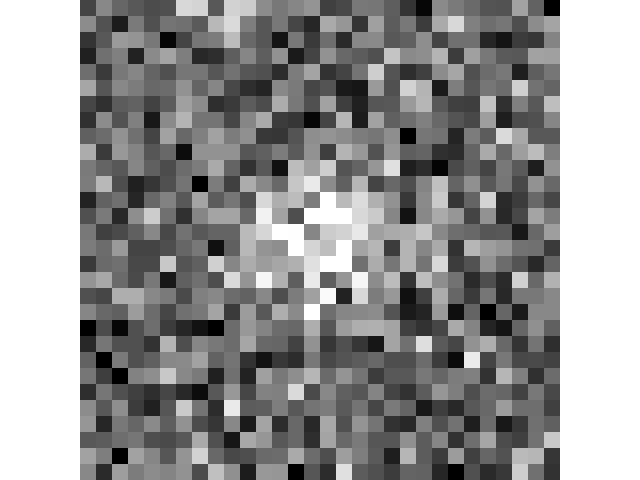

'Subject 36'

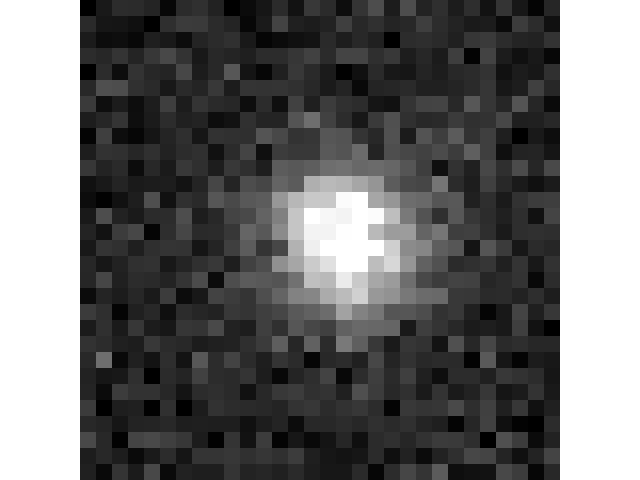

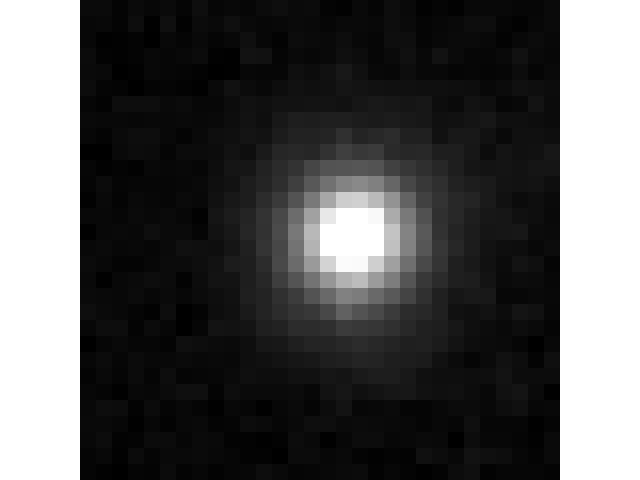

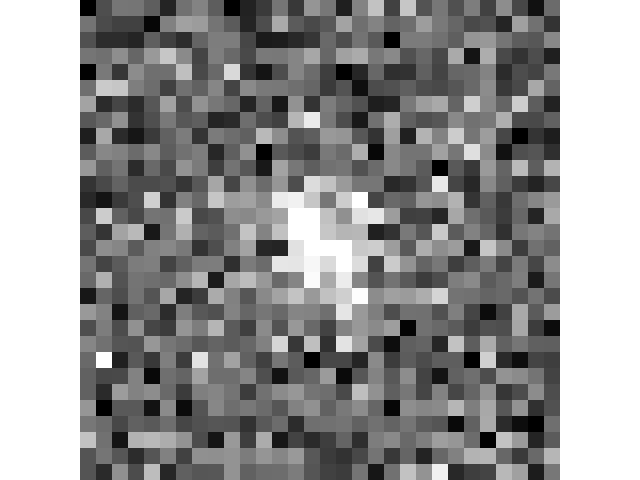

'Subject 37'

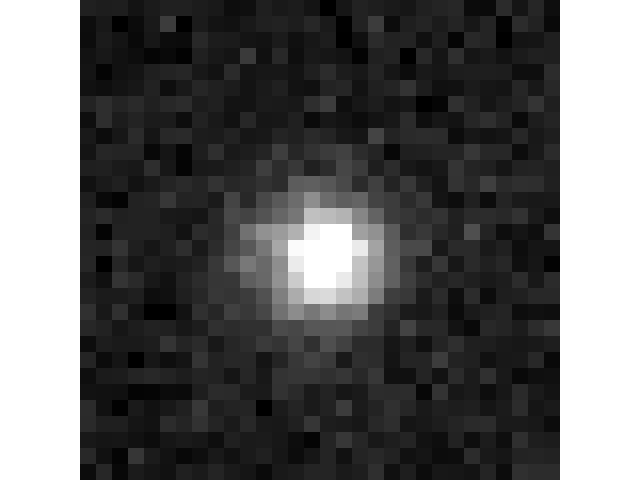

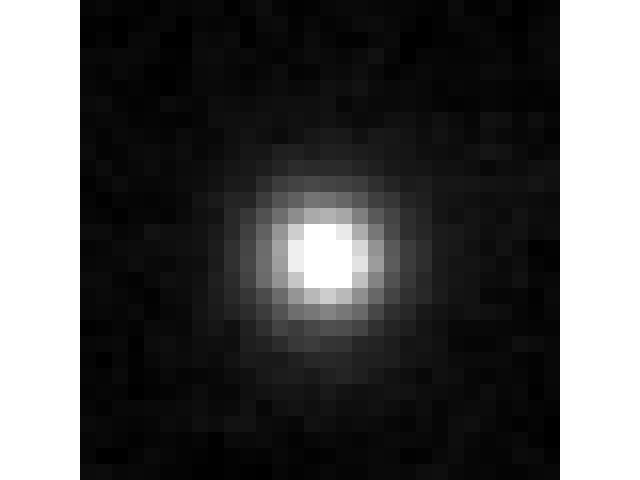

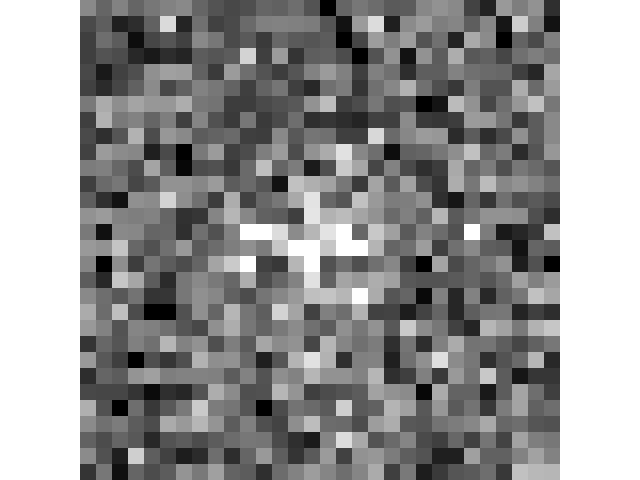

'Subject 38'

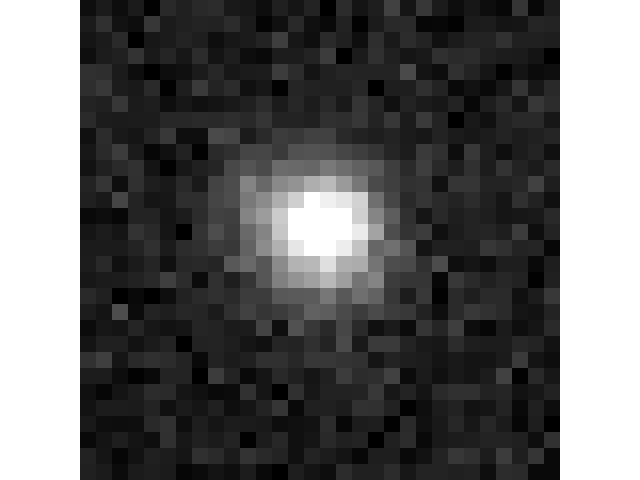

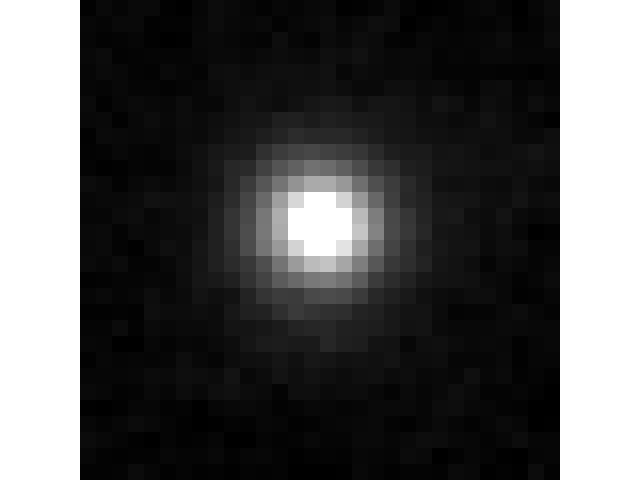

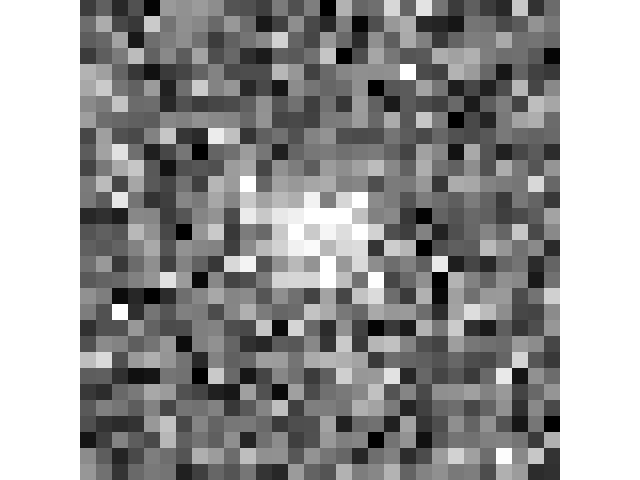

'Subject 39'

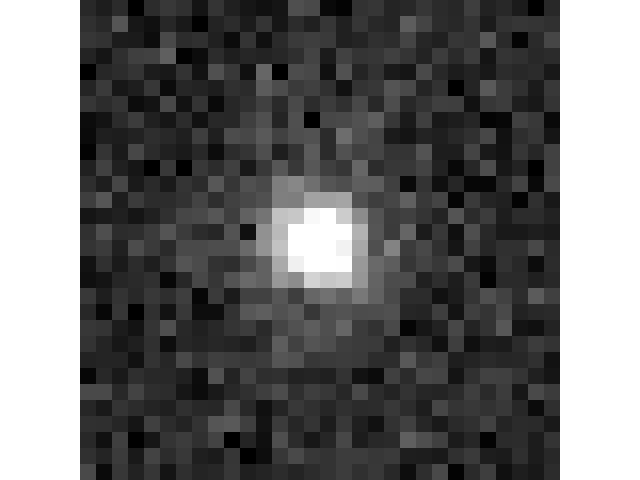

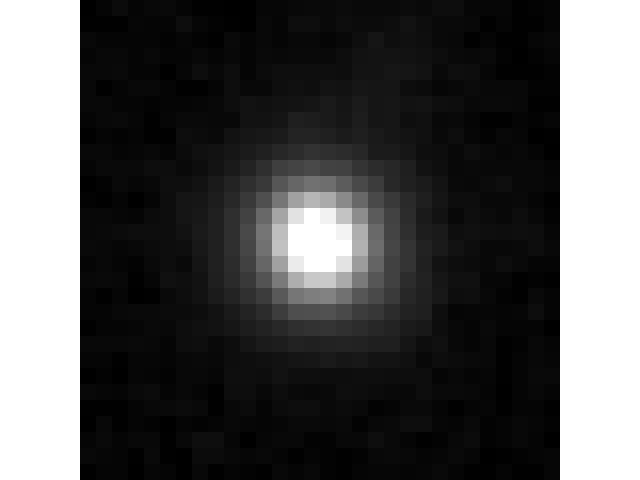

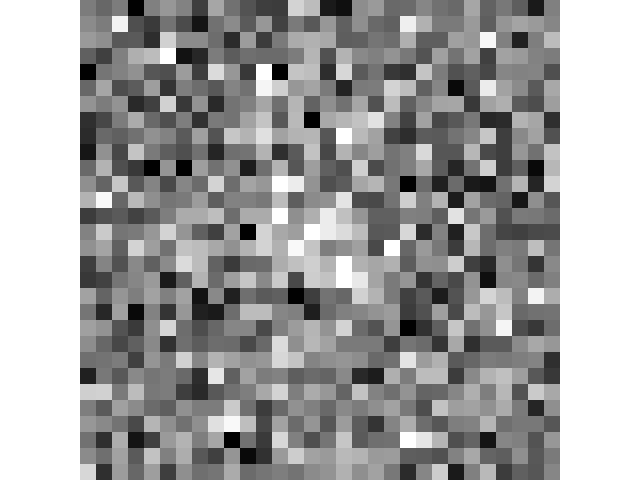

'Subject 40'

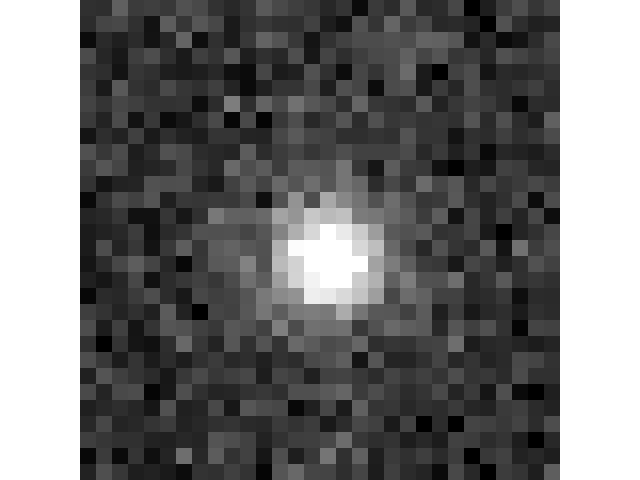

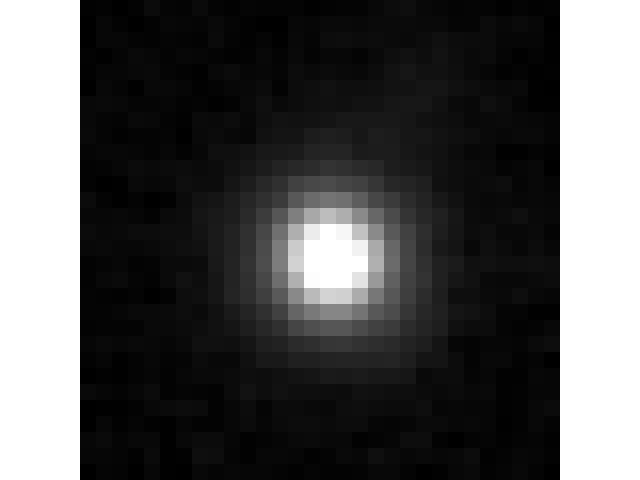

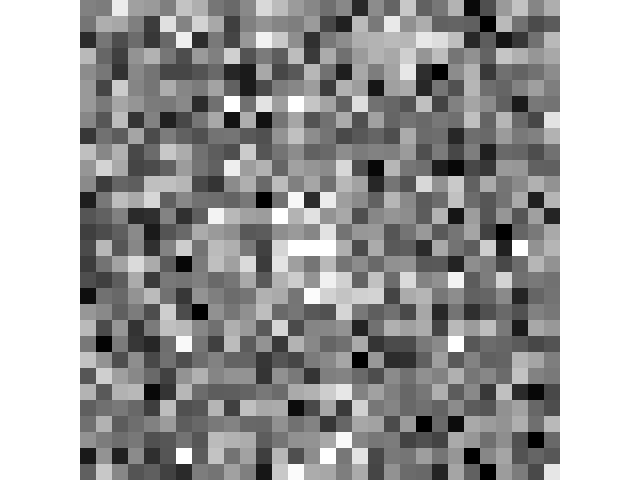

'Subject 41'

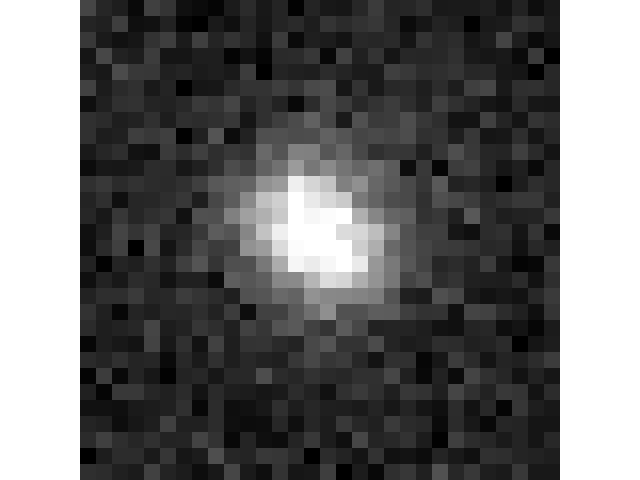

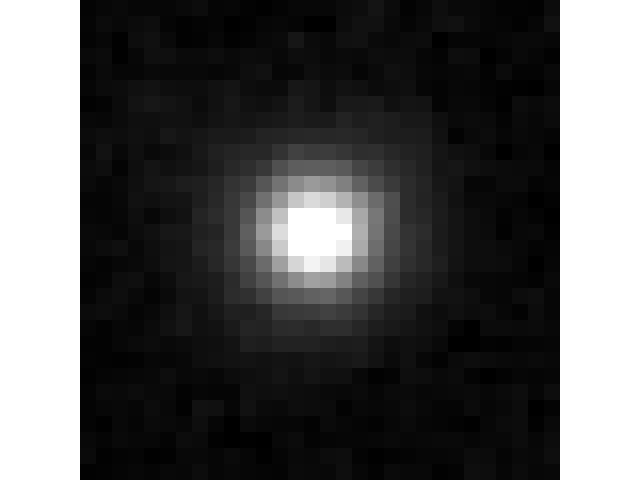

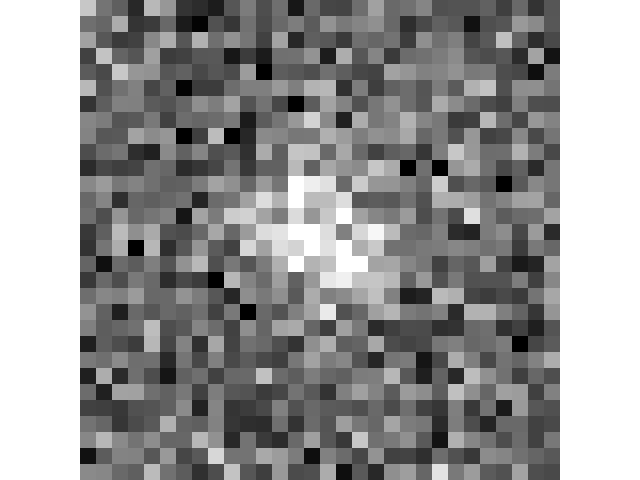

'Subject 42'

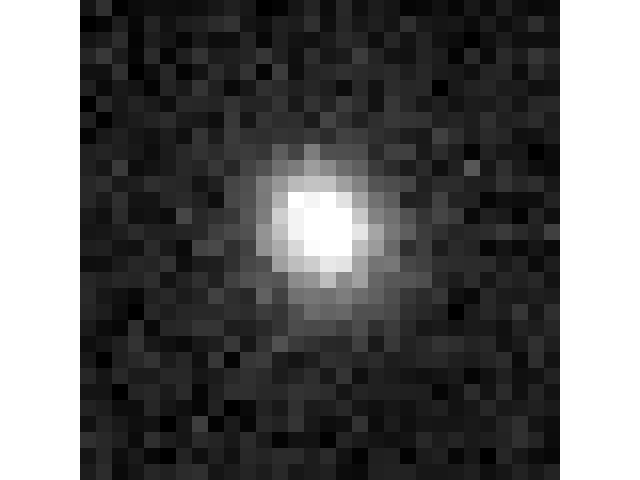

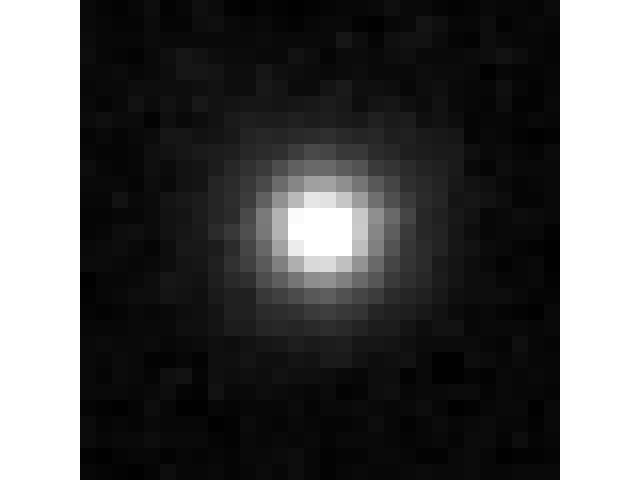

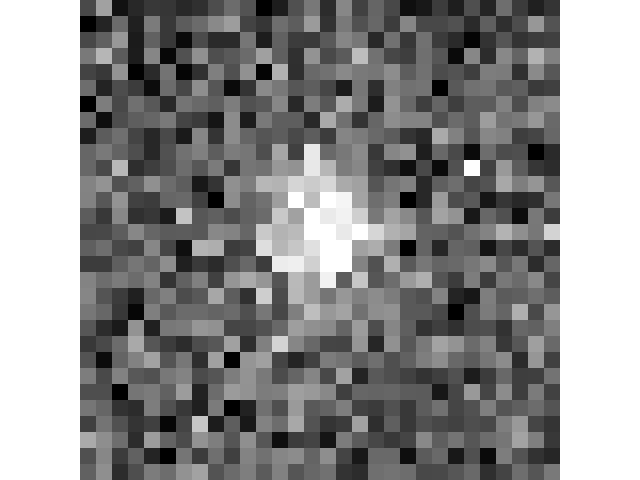

'Subject 43'

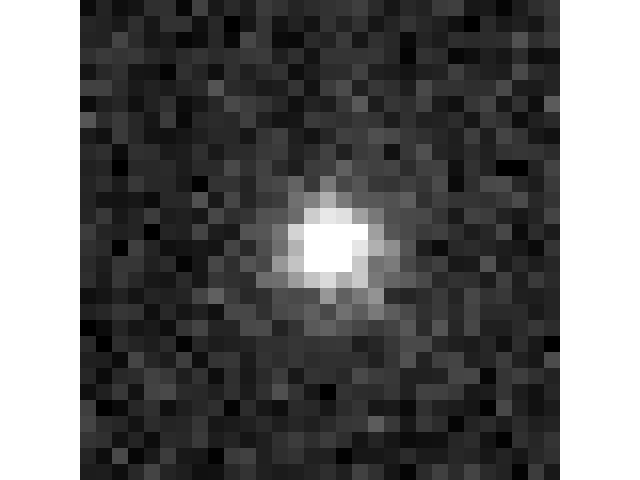

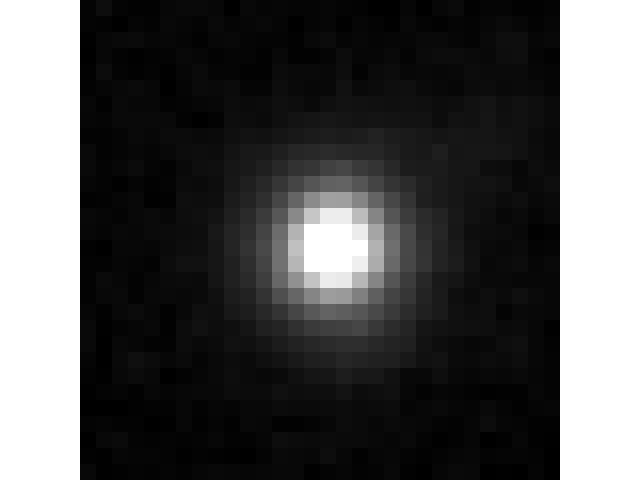

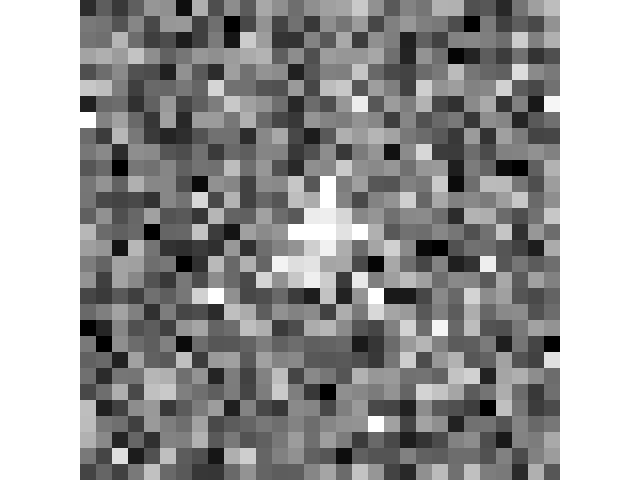

'Subject 44'

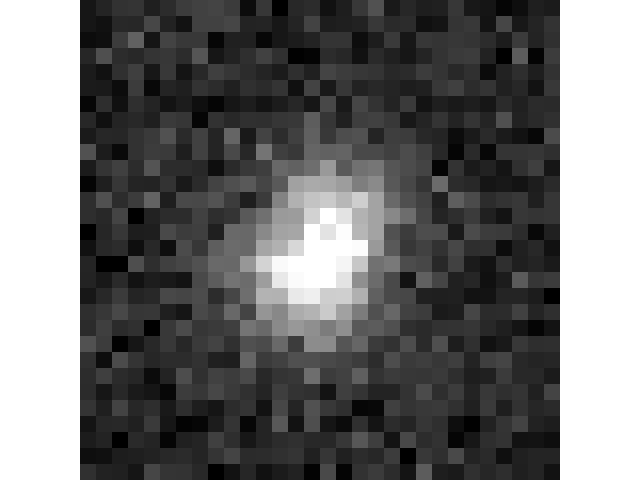

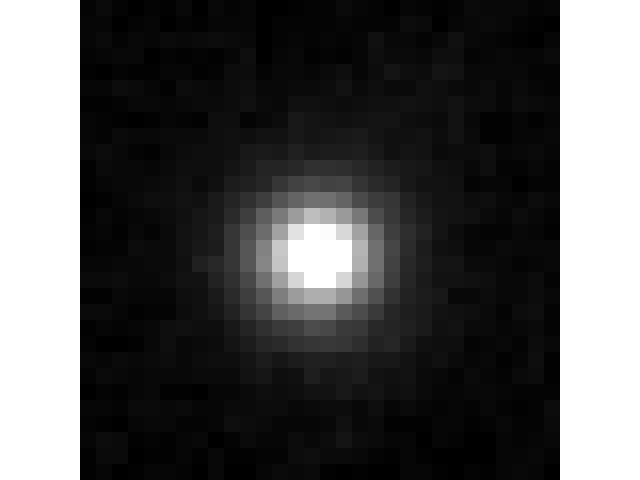

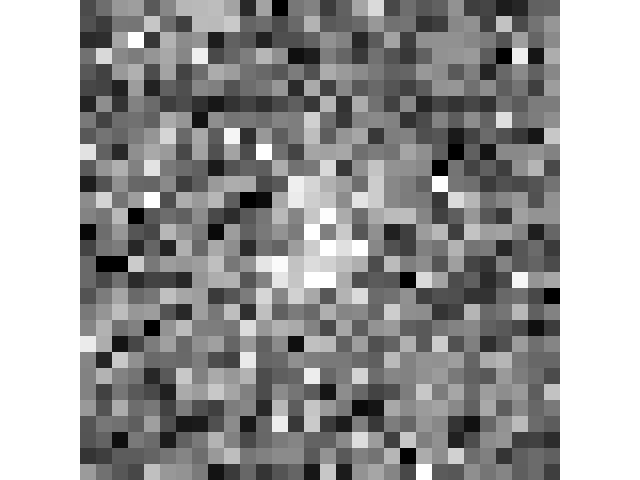

'Subject 45'

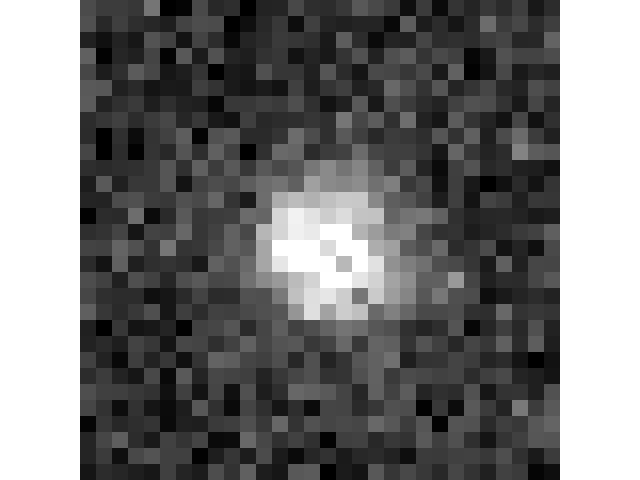

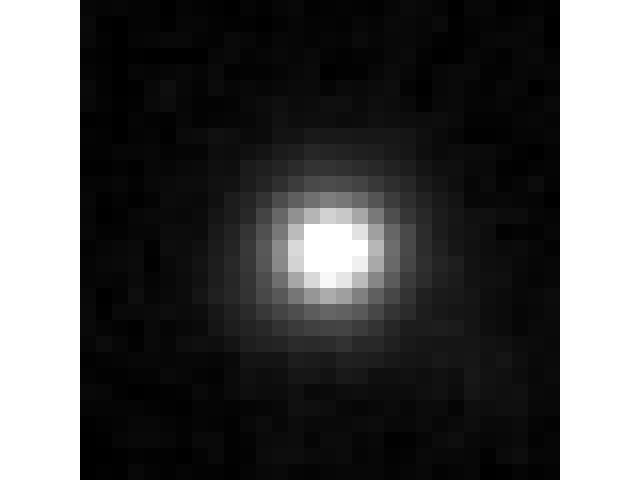

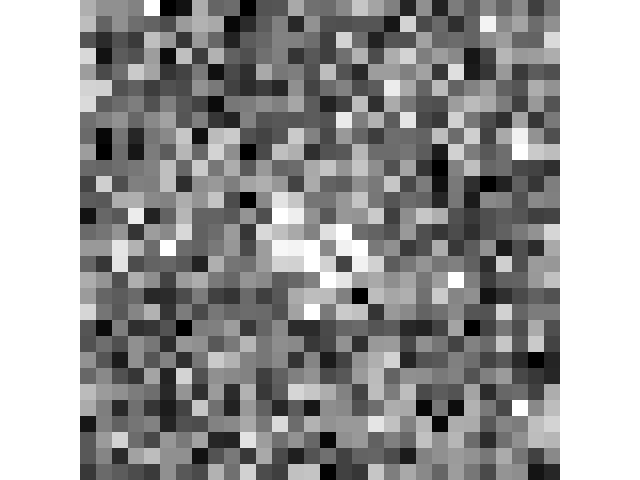

'Subject 46'

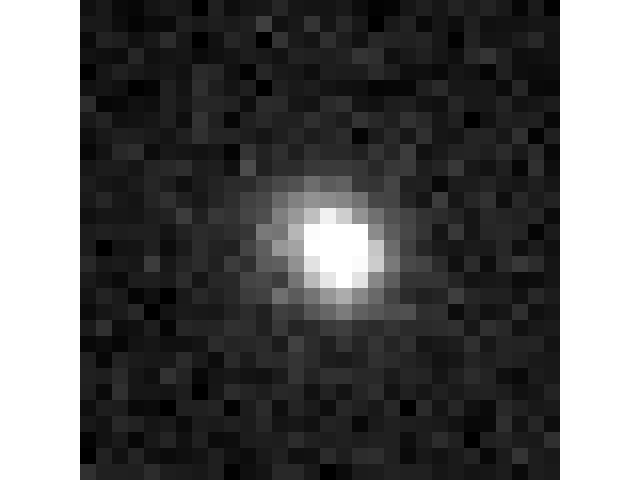

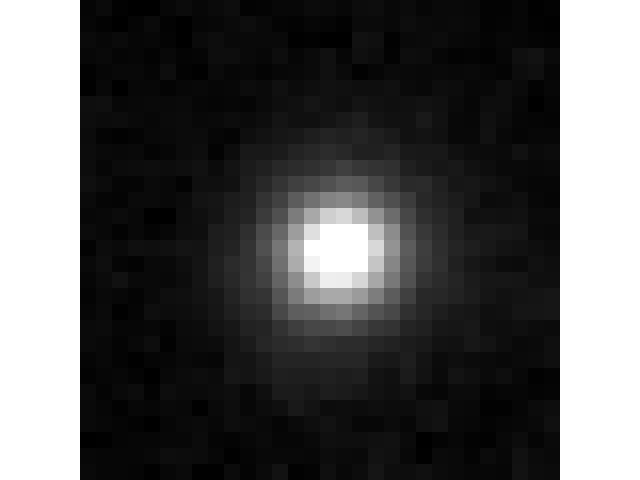

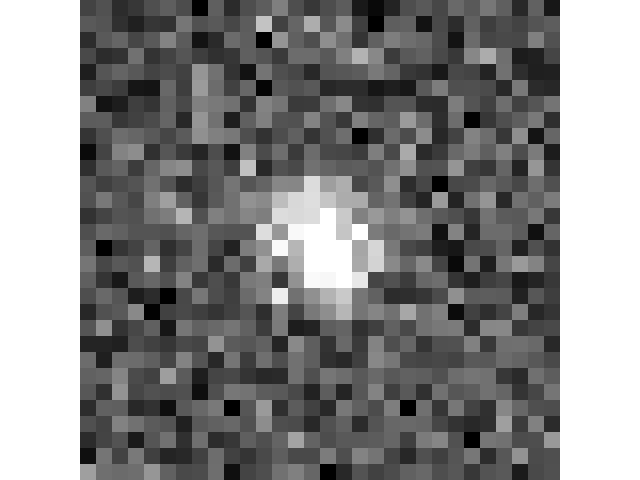

'Subject 47'

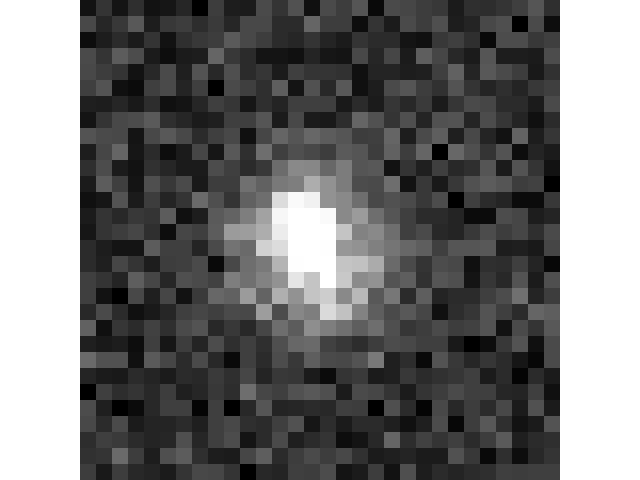

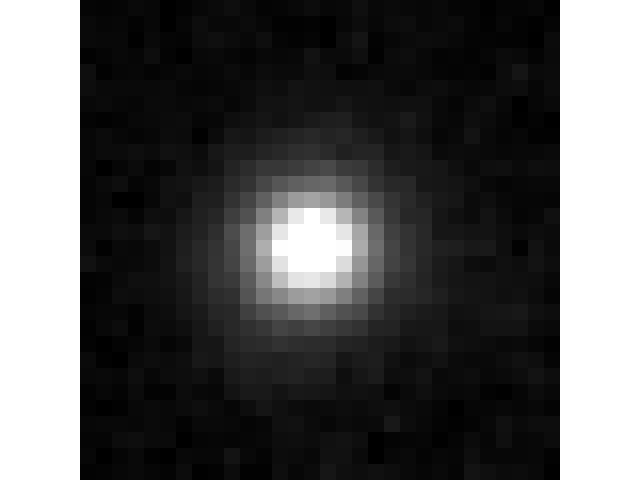

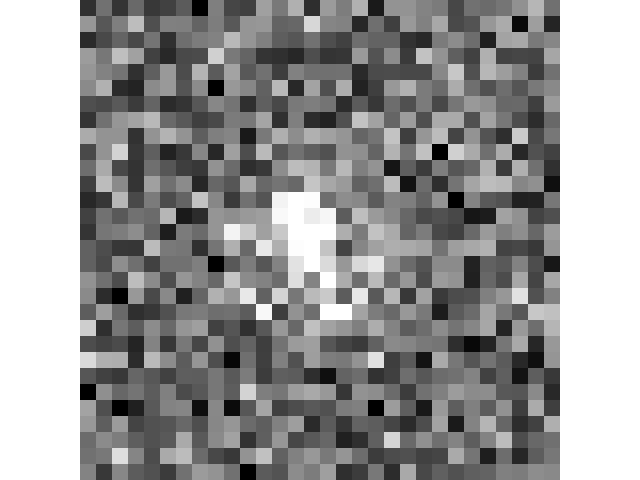

'Subject 48'

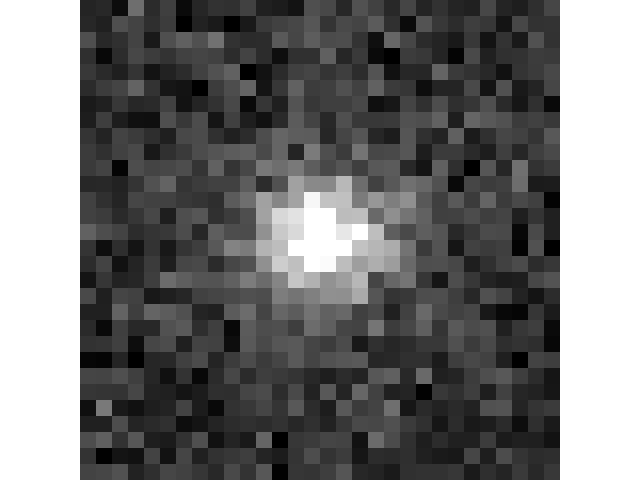

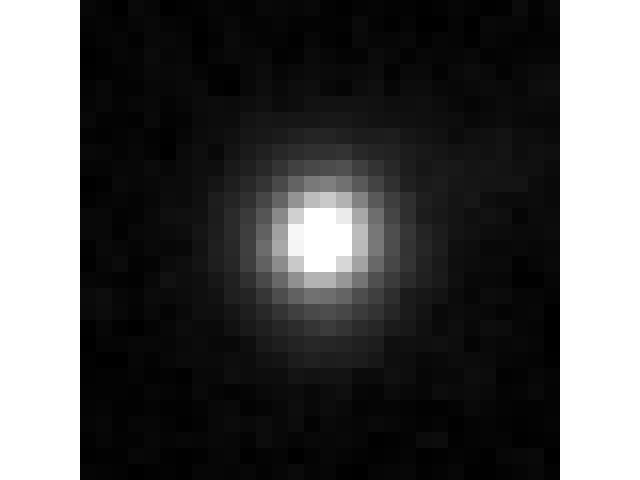

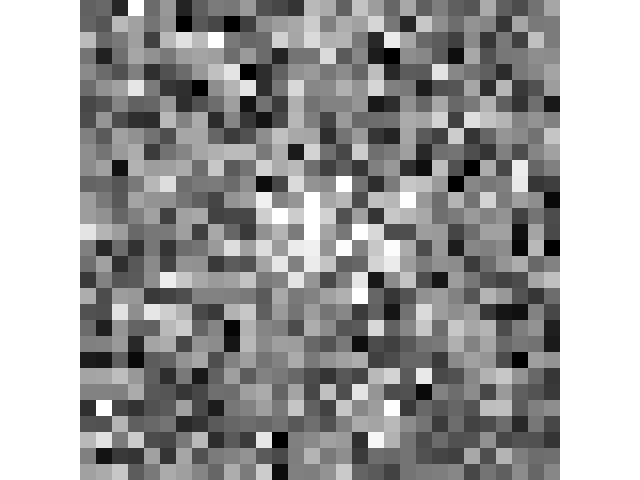

'Subject 49'

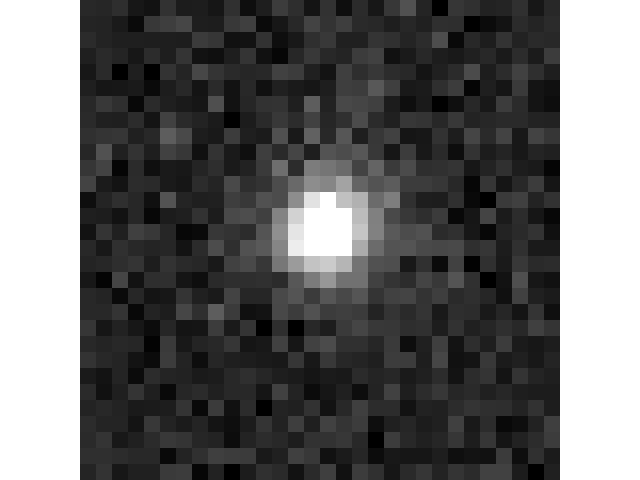

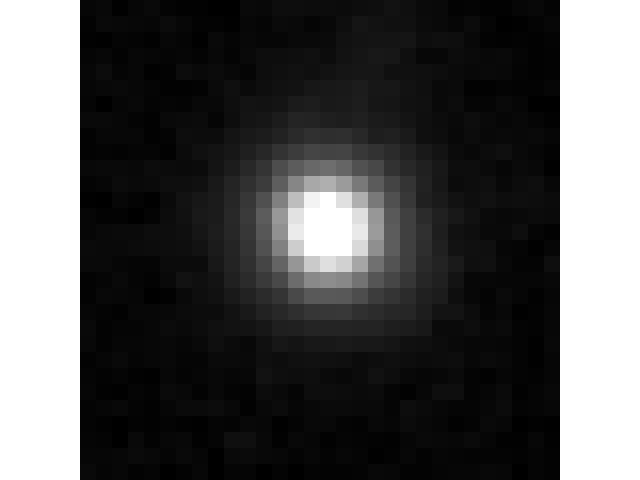

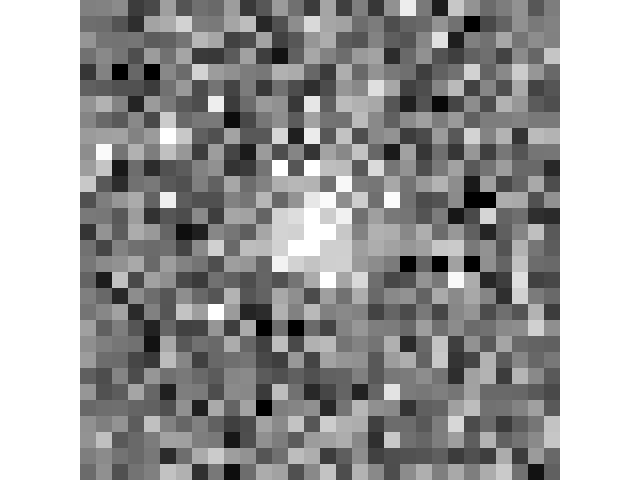

'Subject 50'

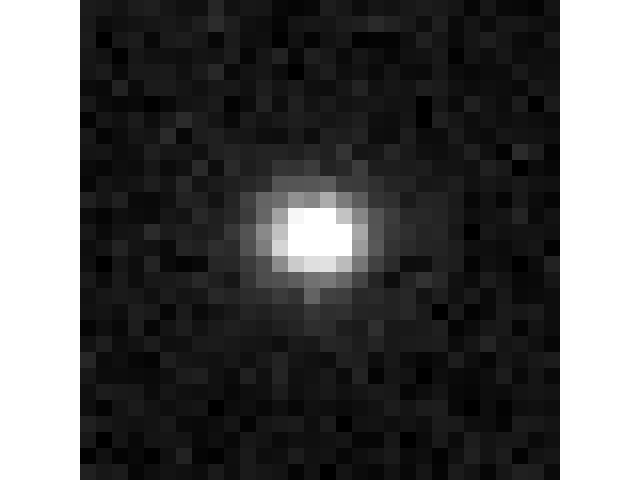

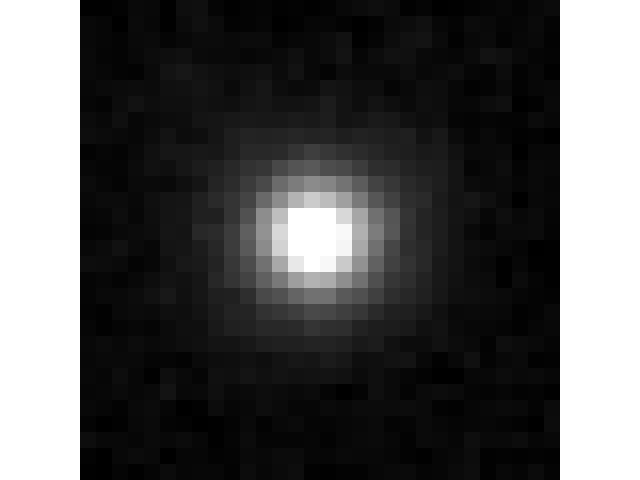

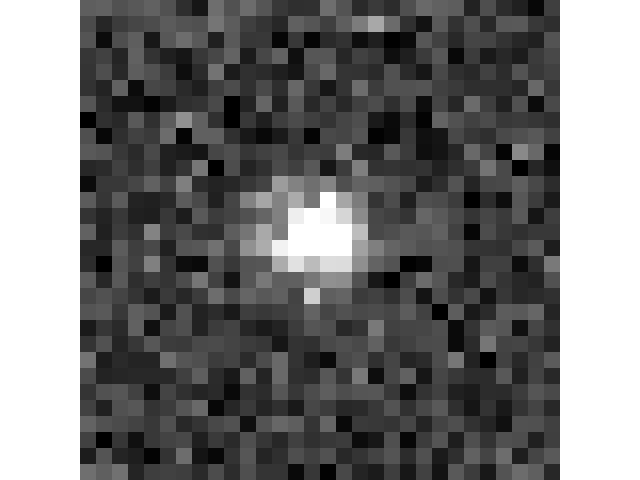

'Subject 51'

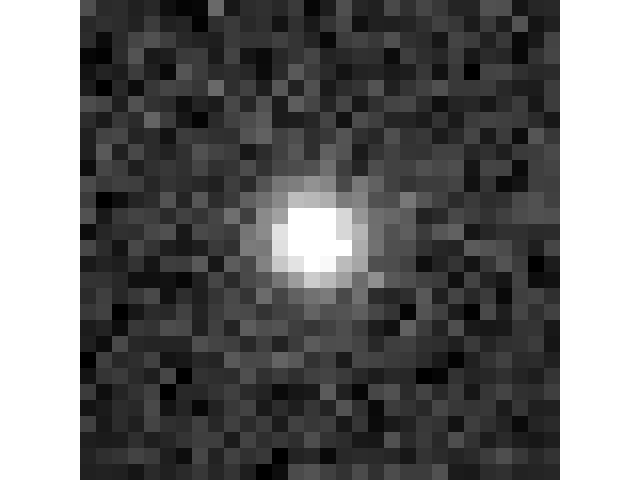

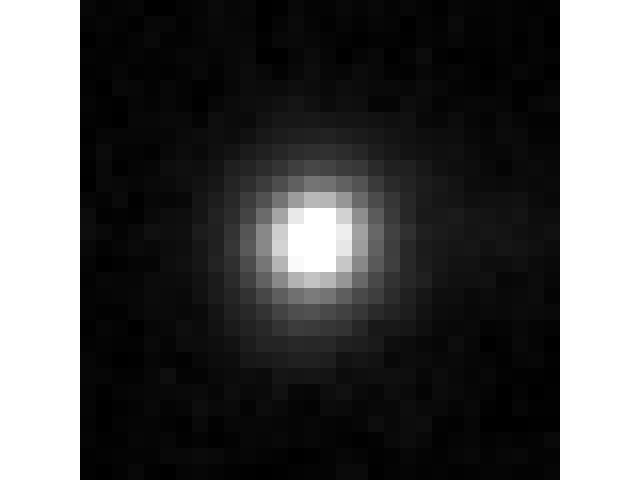

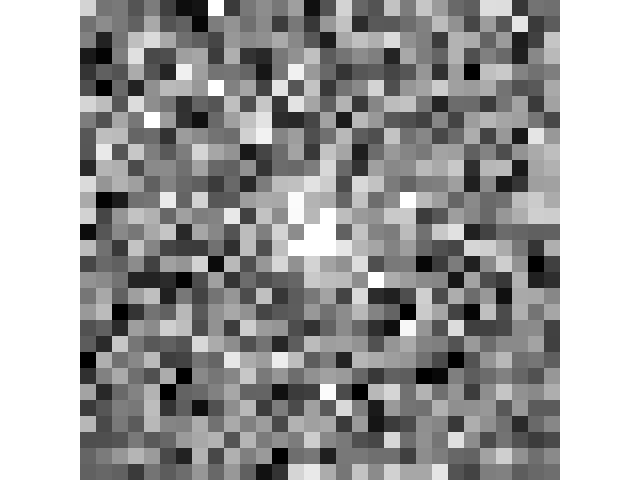

'Subject 52'

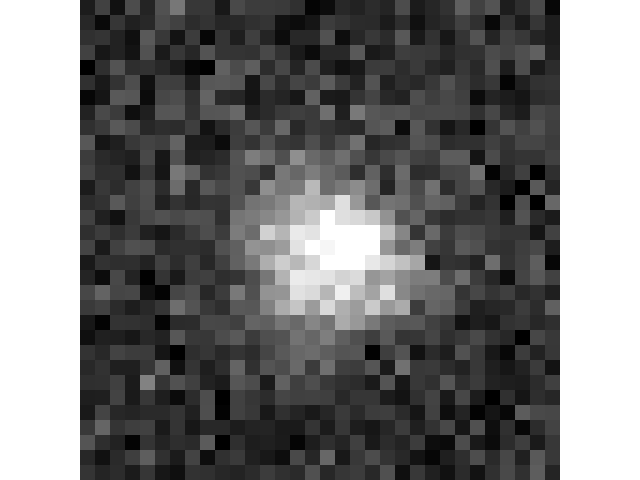

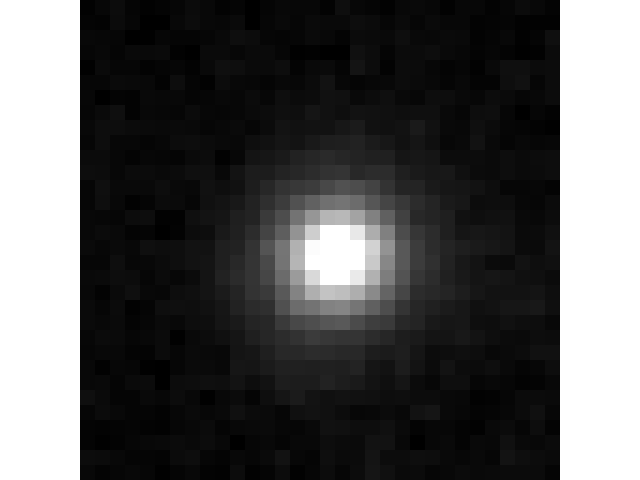

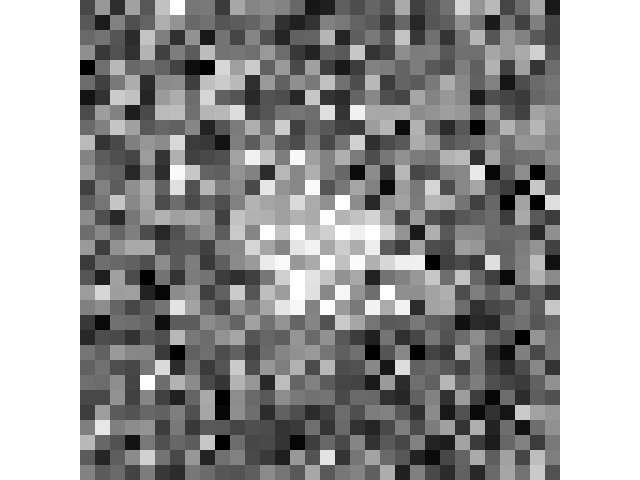

'Subject 53'

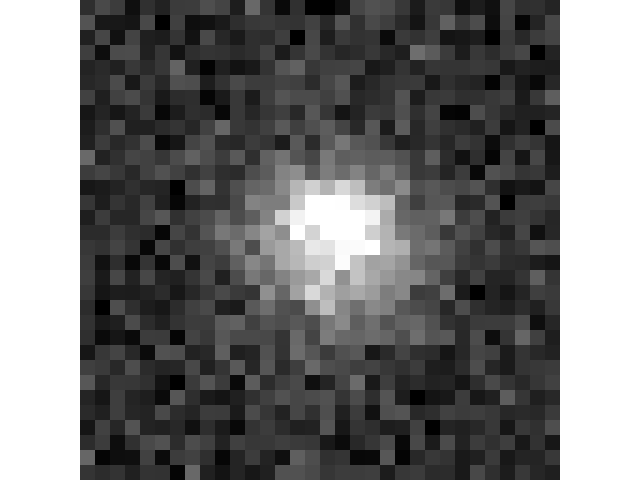

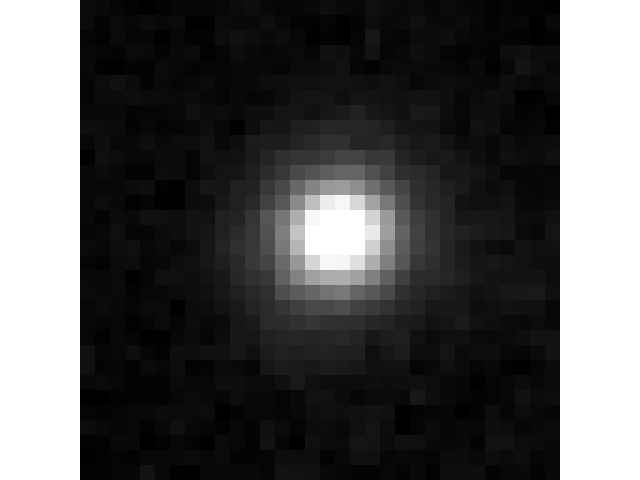

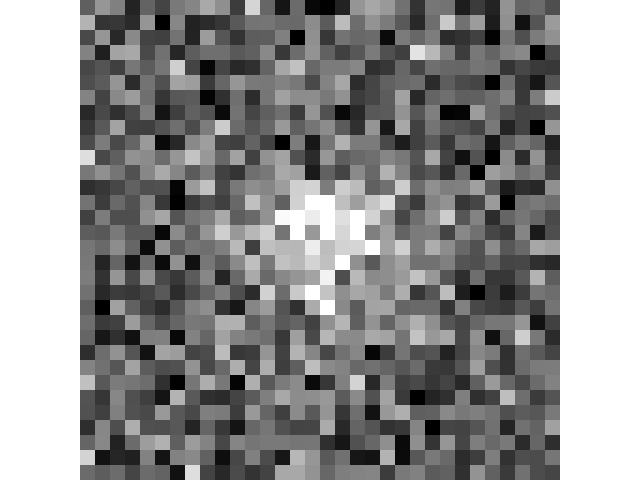

'Subject 54'

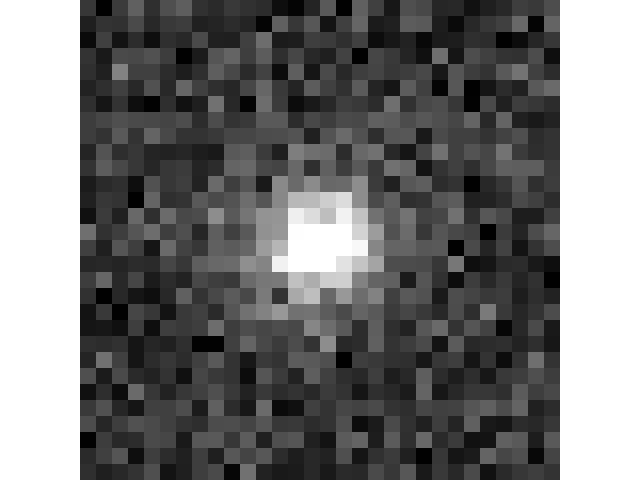

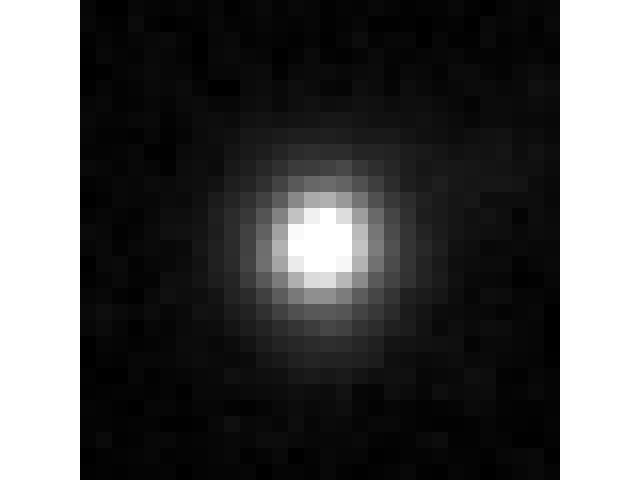

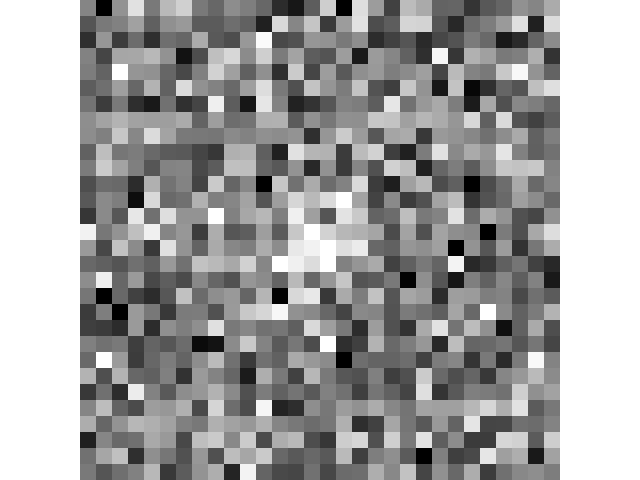

'Subject 55'

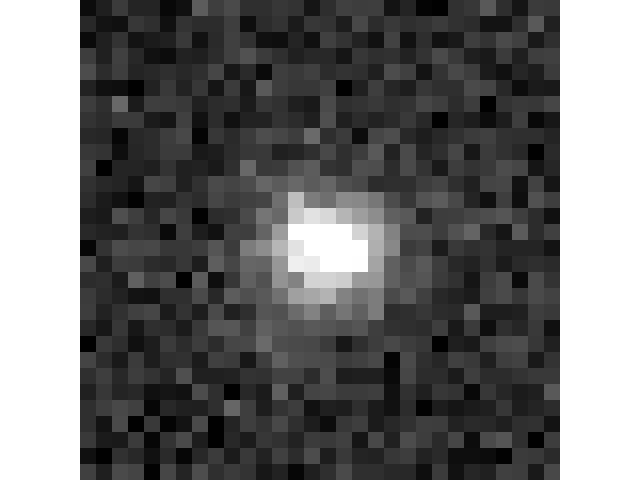

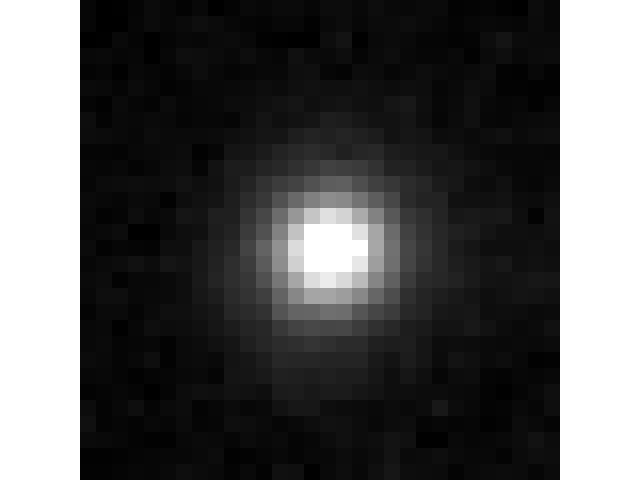

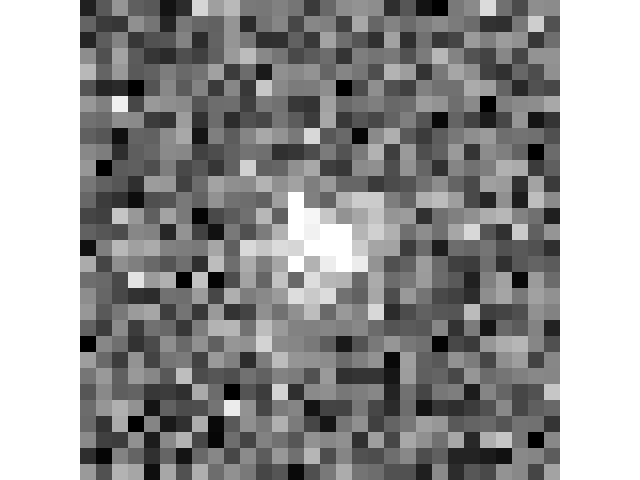

'Subject 56'

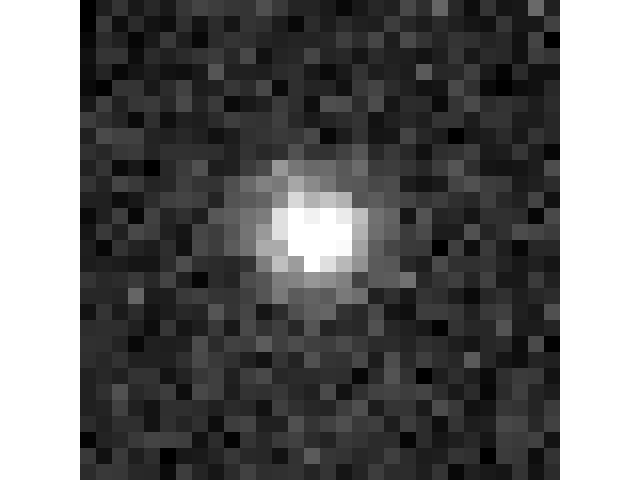

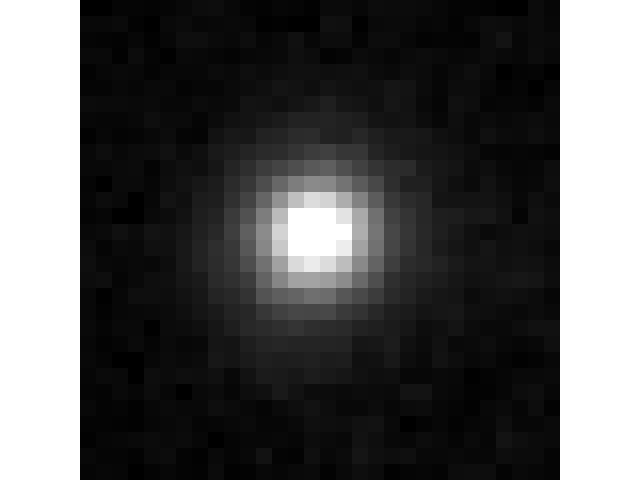

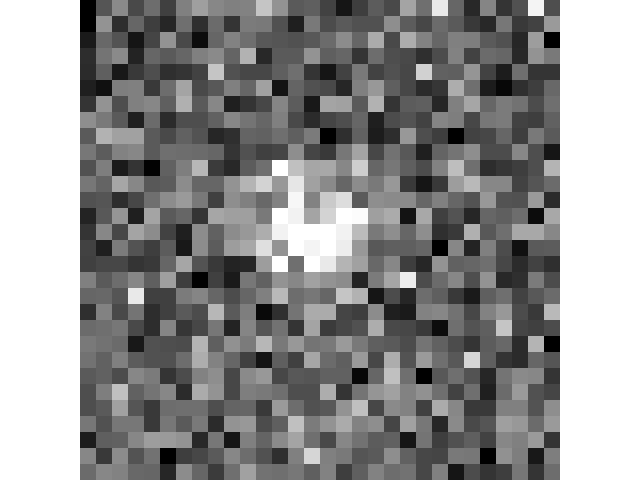

'Subject 57'

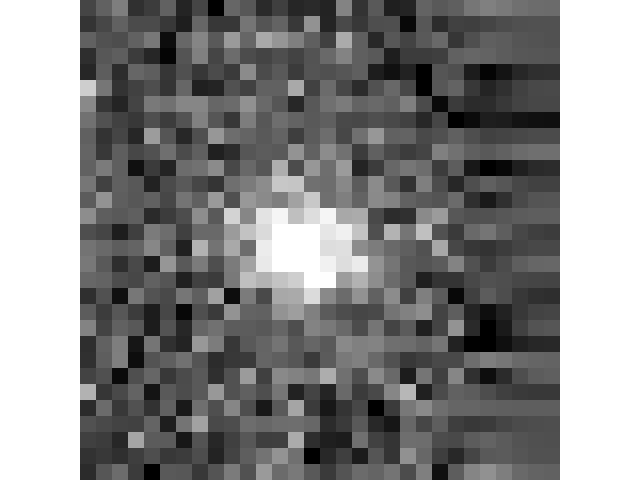

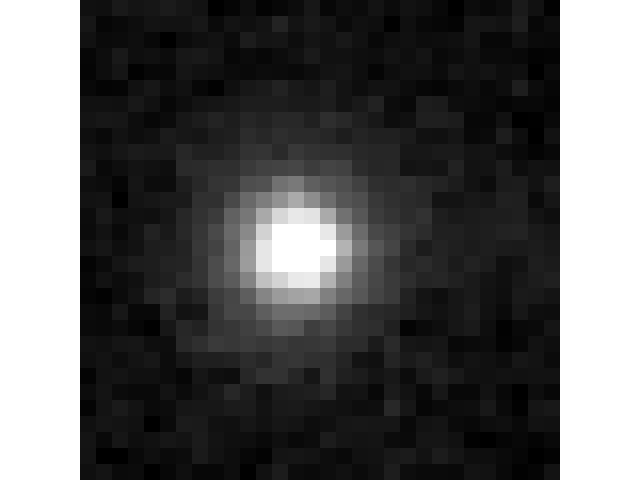

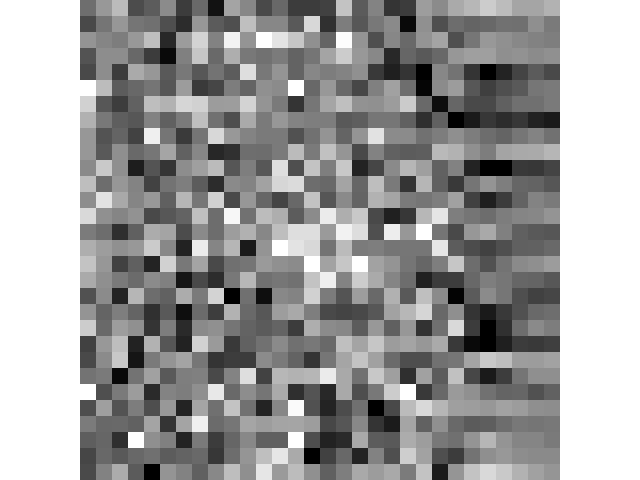

'Subject 58'

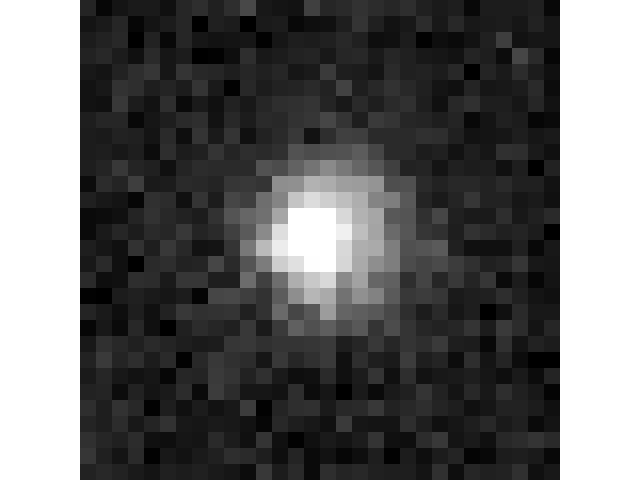

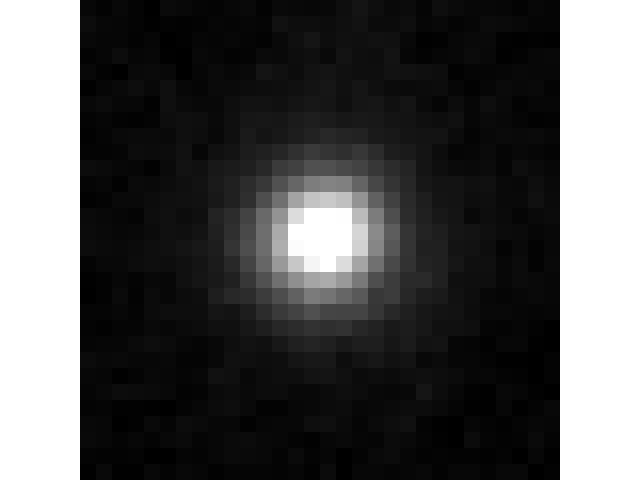

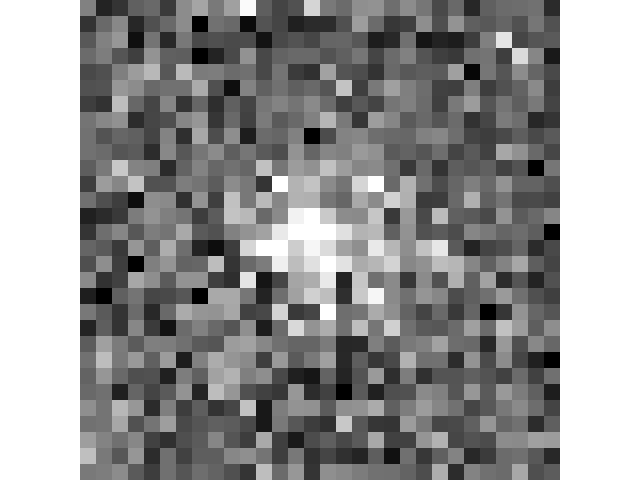

'Subject 59'

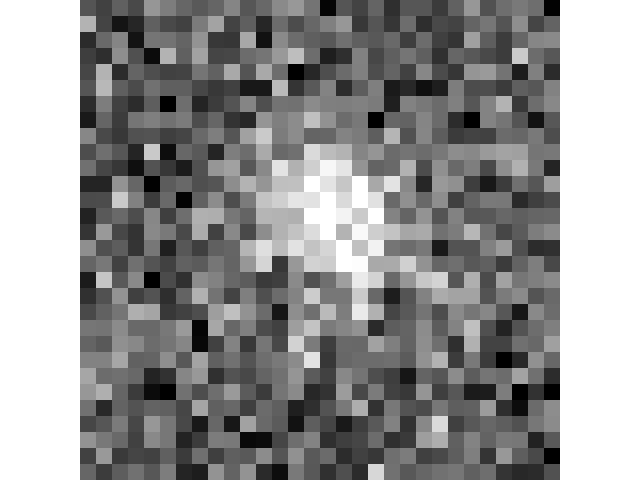

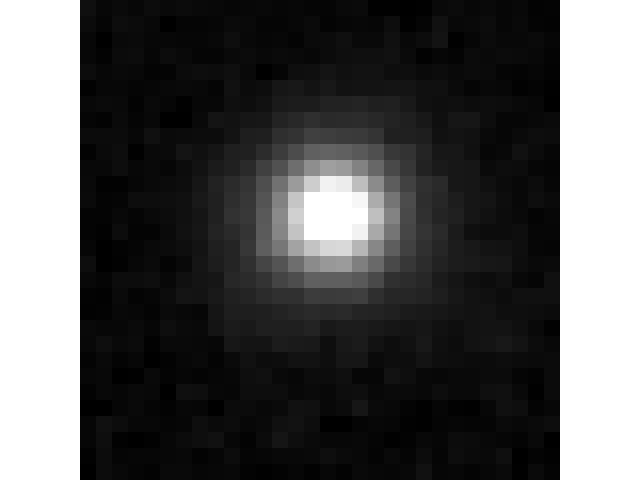

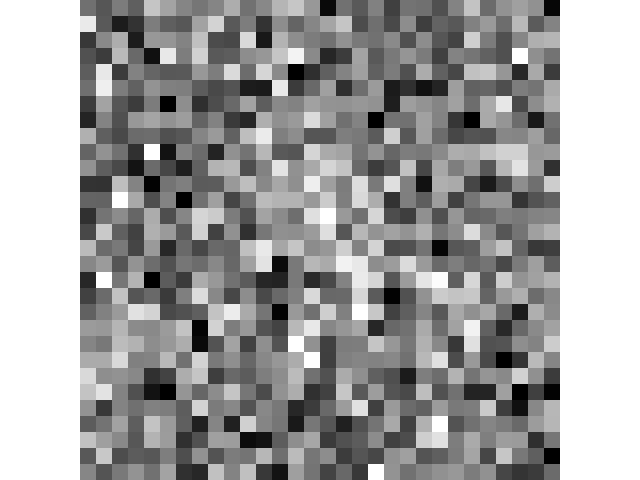

'Subject 60'

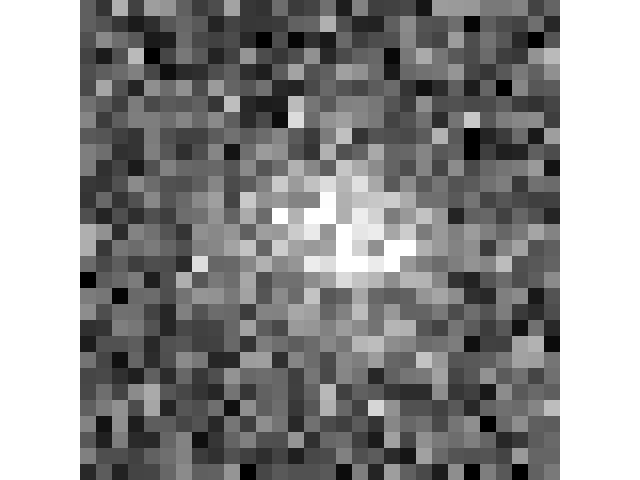

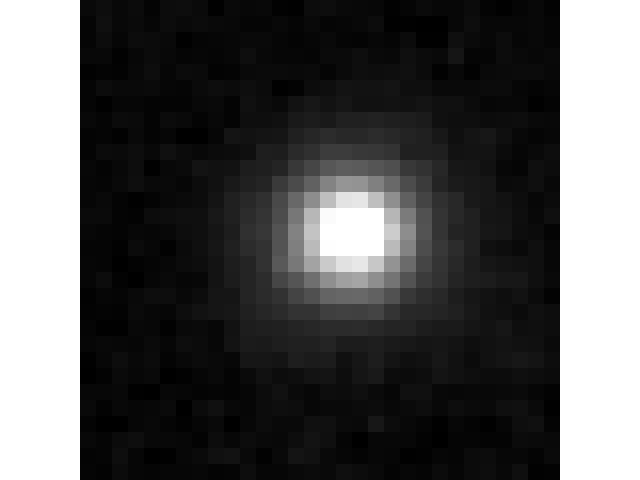

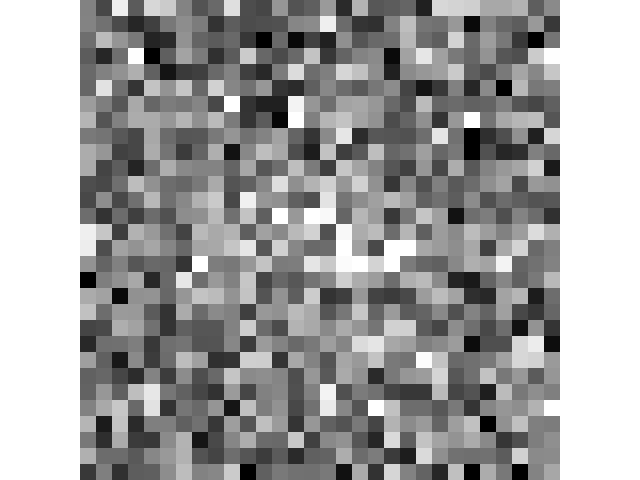

'Subject 61'

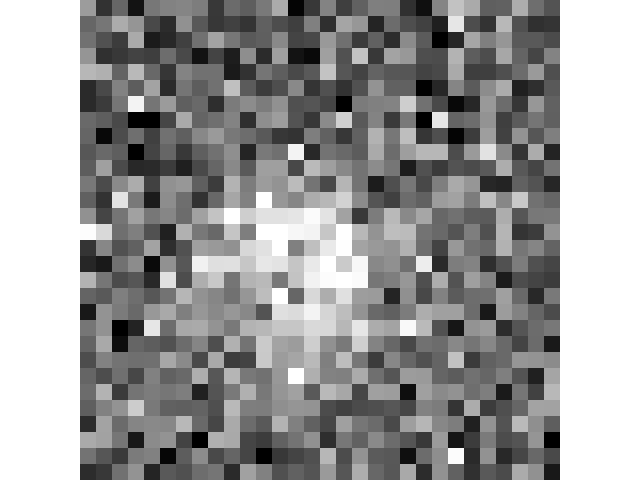

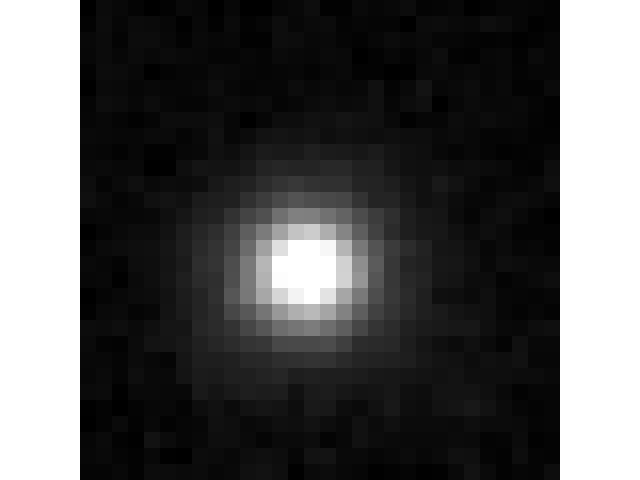

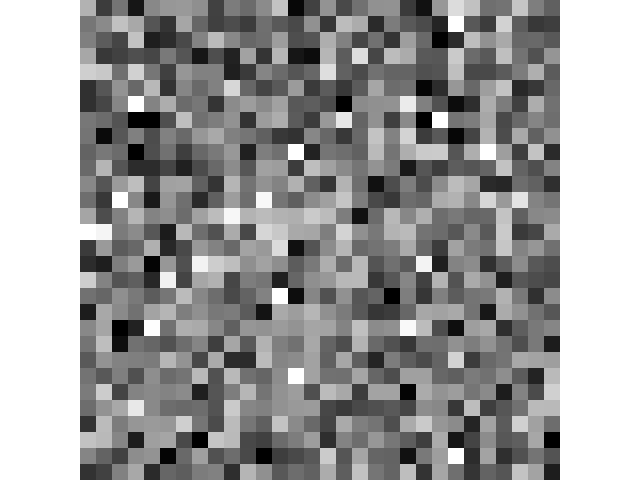

In [ ]:
subjects = []
for subject_index, subject in enumerate(LSSTSubjectGenerator(objectIds, lasair=L), start=1):
    subjects.append(subject)
    display(f"Subject {subject_index}")

    for location, media_file in zip(subject.locations, subject._media_files):
        display(Image(data=media_file))

# SubjectSet(SUBJECT_SET_ID).add(subjects)
